## ProtugeseBank (Portuguese Bank Marketing Project)

**Problem Statement**

Task 1: Prepare a complete data analysis report on the given data.

Task 2: Create a predictive model which will help the bank marketing team to know which customer [profile] will buy the product.

Task 3: Suggestions to the Bank market team to make  customers  buy the product.



In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import mode

#### Load the Dataset

In [4]:
bank_data = pd.read_csv("bank-additional-full.csv", sep=';')

FileNotFoundError: [Errno 2] No such file or directory: 'bank-additional-full.csv'

- For each observation, the dataset records 20 input variables that stand for both qualitative and quantitative attributes of the customer, such as age, job, housing and personal loan status, account balance, and the number of contacts etc.


- There is a single binary output variable that denotes “yes” or “no” revealing the outcomes of the phone calls.

#### Exploratory Data Analysis (EDA) / Basic Checks

To obtain a better understanding of the dataset, the distribution of key variables and the relationships among them were plotted.

In [9]:
bank_data.age.value_counts()

NameError: name 'bank_data' is not defined

In [10]:
# Compare independent variable 'age' and target variable 'y'
sns.countplot(x='age',hue='y',data=bank_data)
plt.show()

NameError: name 'bank_data' is not defined

**Insights**

While age represents a person’s life stage and balance represents a person’s financial condition, jointly evaluating the impact of these two factors enables us to investigate if there is a common trend across all ages, and to identify which combination of client features indicates the highest likelihood of subscription.

In order to investigate the combined effect of age and balance on a client’s decision, we performed a two-layer grouping, segmenting customers according to their balance levels within each age group.

The graph tells the same story regarding the subscription rate for different age groups: the willingness to subscribe is exceptionally high for people aged above 60 and younger people aged below 30 also have a distinguishable higher subscription rate than those of other age groups.

Furthermore, the effect of balance levels on subscription decision is applicable to each individual age group: every age group shares a common trend that the percentage of subscription increases with balance.

In sum, the bank should prioritize its telemarketing to clients who are above 60 years old and have positive balances, because they have the highest acceptance rate of about 35%. The next group the bank should focus on is young clients with positive balances, who showed high subscription rates between 15% and 20%.

In [11]:
# View the first five rows of the dataset
bank_data.head()

NameError: name 'bank_data' is not defined

In [4]:
# View the last five rows of the dataset
bank_data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
# View the shape of the dataset
bank_data.shape

(41188, 21)

In [6]:
# View the statistical information of the numerical columns (features)
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [7]:
# View datatypes of the features in the dataset
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Data Preprocessing

In [8]:
# Check for null values
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### There are no null values in our dataset.

## Dealing With Categorical Data
Use Label Encoder to convert the categorical data to numerical data

In [16]:
# Use Label Encoder to convert the categorical data to numerical data

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

bank_data.job=lc.fit_transform(bank_data.job)
bank_data.marital=lc.fit_transform(bank_data.marital)
bank_data.education=lc.fit_transform(bank_data.education)
bank_data.default=lc.fit_transform(bank_data.default)
bank_data.housing=lc.fit_transform(bank_data.housing)
bank_data.loan=lc.fit_transform(bank_data.loan)
bank_data.contact=lc.fit_transform(bank_data.contact)
bank_data.month=lc.fit_transform(bank_data.month)
bank_data.day_of_week=lc.fit_transform(bank_data.day_of_week)
bank_data.poutcome=lc.fit_transform(bank_data.poutcome)
bank_data.y=lc.fit_transform(bank_data.y)

In [17]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [18]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Feature & Model Selection

### Univariate Analysis
Source: <a href="https://github.com/sukanta-27/Predicting-Success-of-Bank-Telemarketing/blob/master/Jupyter%20Notebook/Bank_Marketing_CaseStudy.ipynb">Sukanta Roy's Univariate Analysis from GitHub</a>

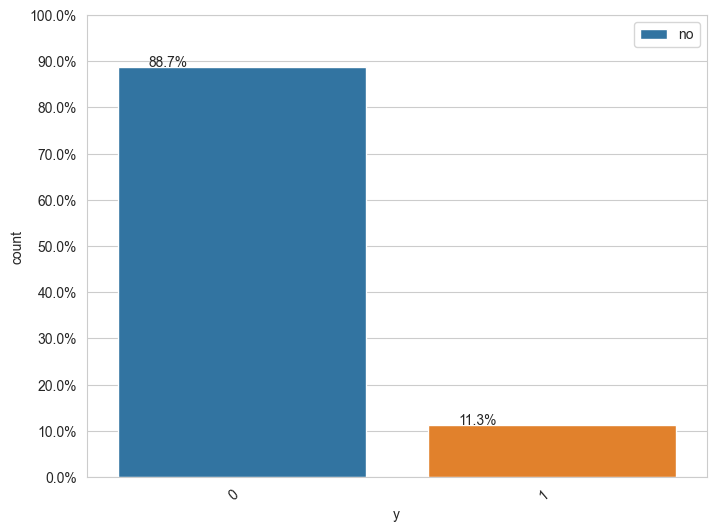

In [19]:
plt.figure(figsize=(8,6))
Y = bank_data["y"]
total = len(Y)*1.
ax=sns.countplot(x="y", data=bank_data)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

# Put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
# Adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.legend(labels=["no","yes"])
plt.show()

### The majority of customers do not subscribe to the term deposit.

In [20]:
def countplot(label, dataset):
    plt.figure(figsize=(15,10))
    Y = bank_data[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset)
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    # ax.legend(labels=["no","yes"])
    plt.show()

In [21]:
%matplotlib inline

def countplot_withY(label, dataset):
    plt.figure(figsize=(20,10))
    Y = bank_data[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset, hue="y")
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    # ax.legend(labels=["no","yes"])
    plt.show()

## Feature: Job

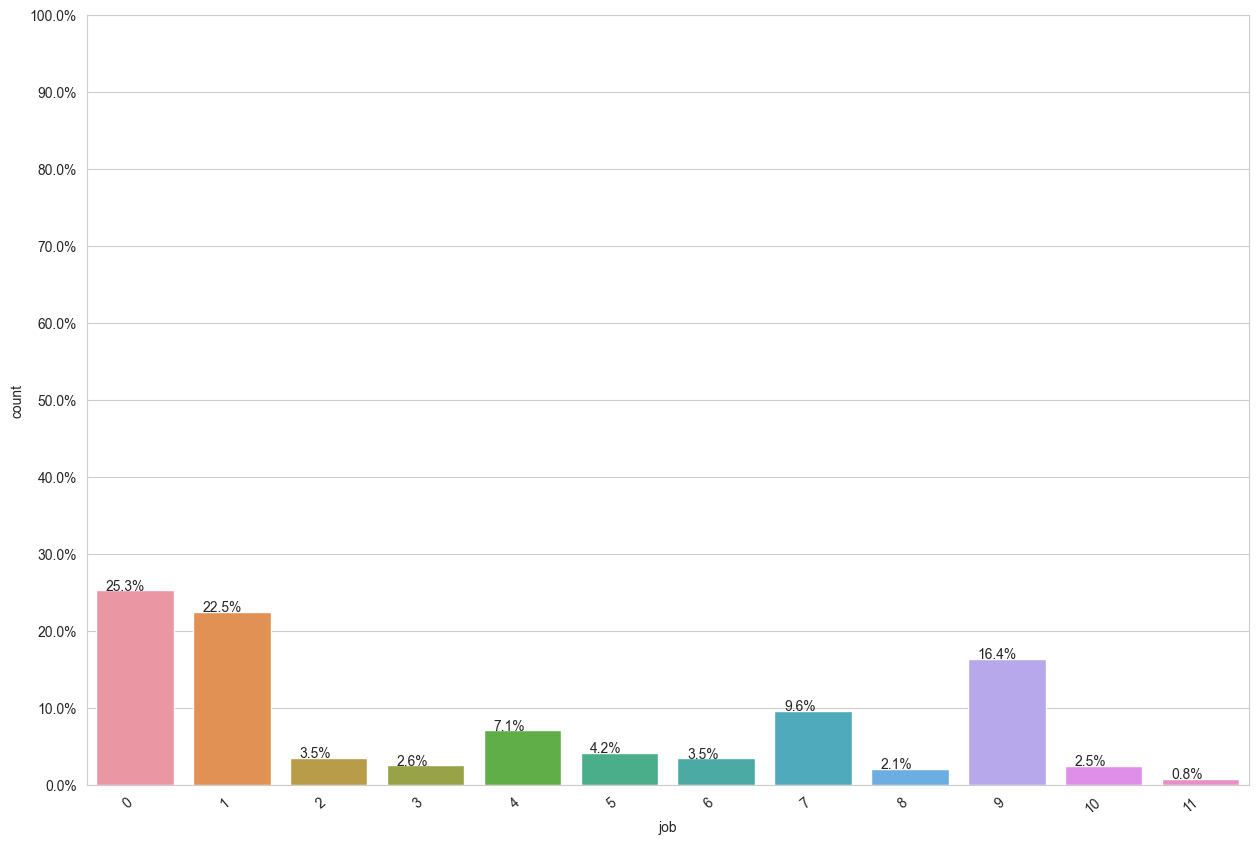

In [22]:
countplot("job", bank_data)

#### The three top job categories in our dataset are Administrative, Blue-Collar, and Technicians. The smallest group is students.

## Feature: Marital

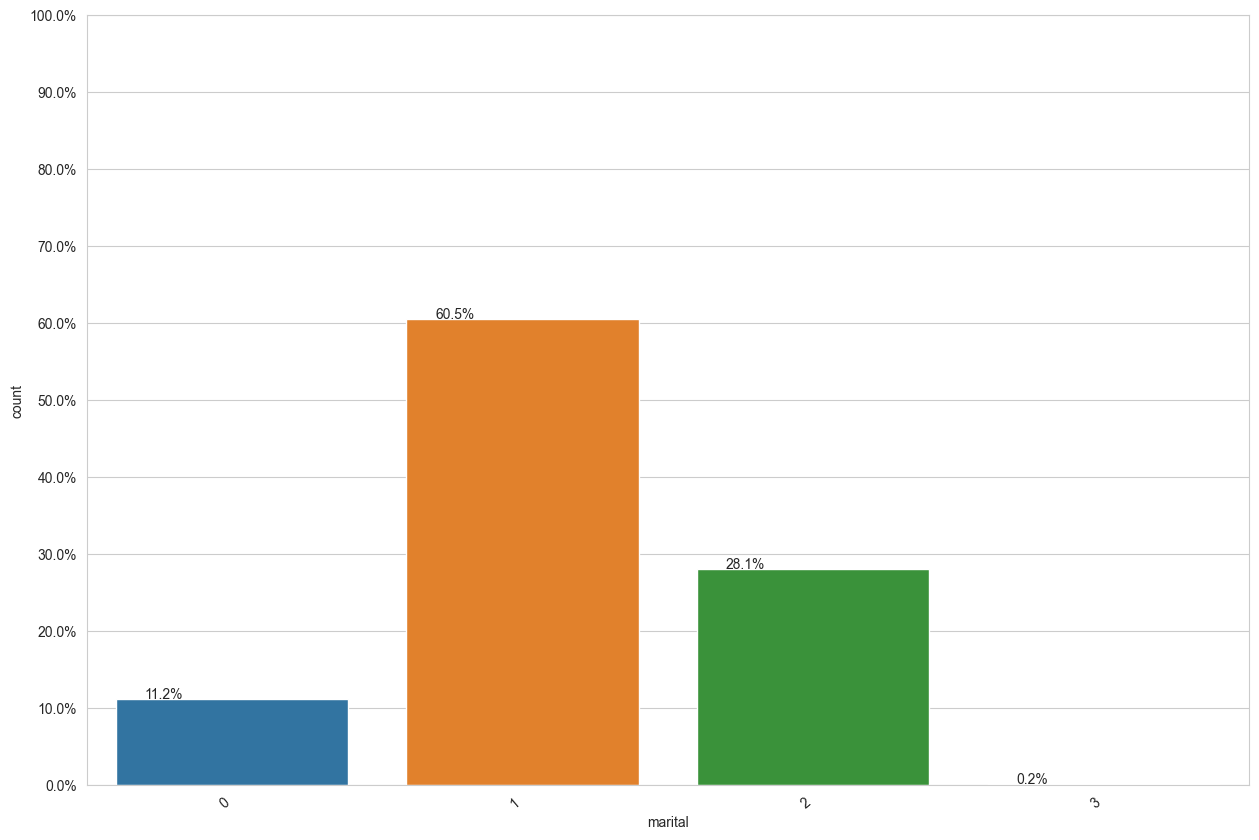

In [23]:
countplot("marital", bank_data)

### The majority of persons are married. Just over half of the dataset.

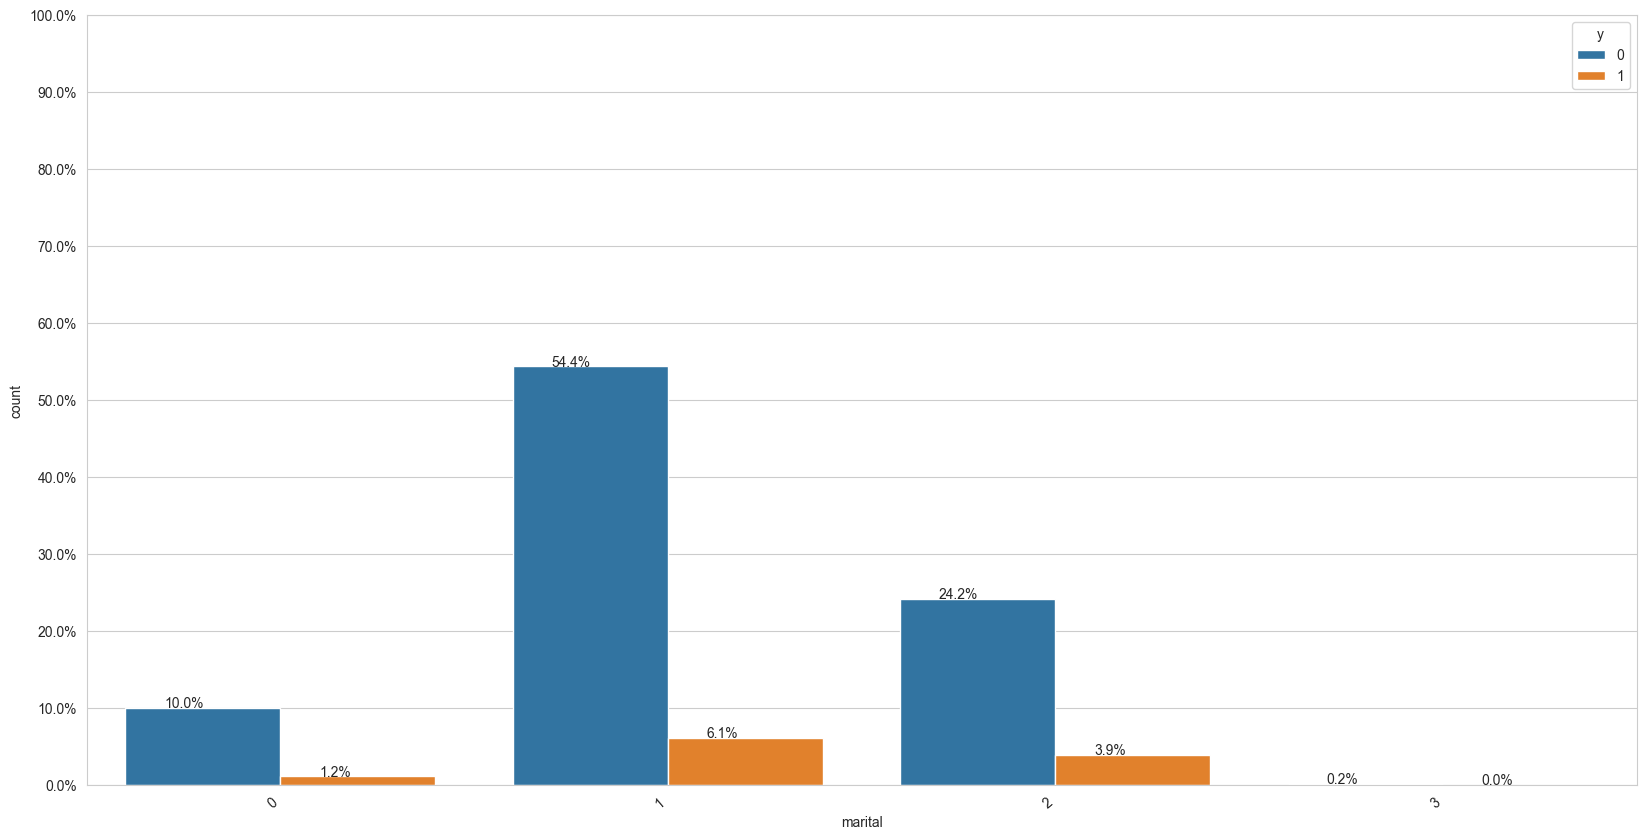

In [24]:
countplot_withY("marital", bank_data)

#### In the marital status feature, of the persons who do subsribe to the term deposit, they are likely to be married.

## Feature: default

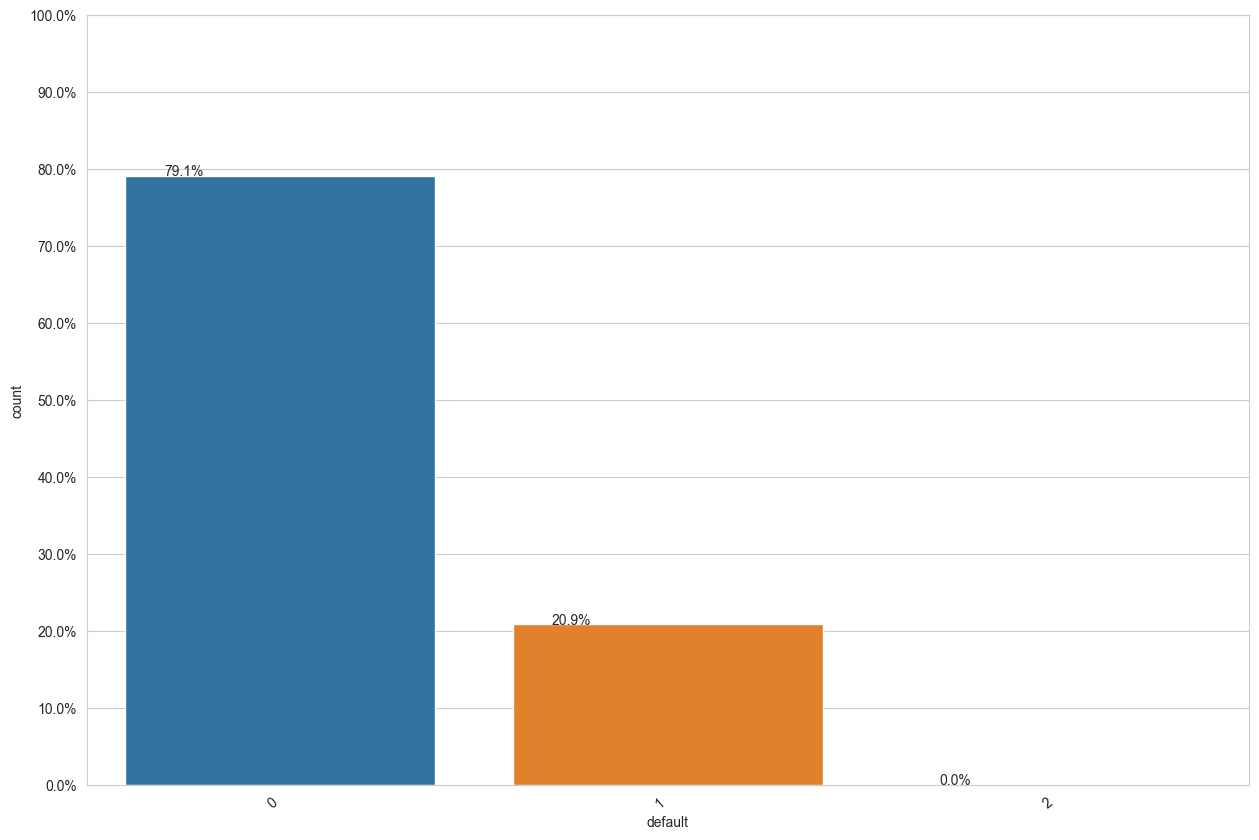

In [25]:
countplot("default", bank_data)

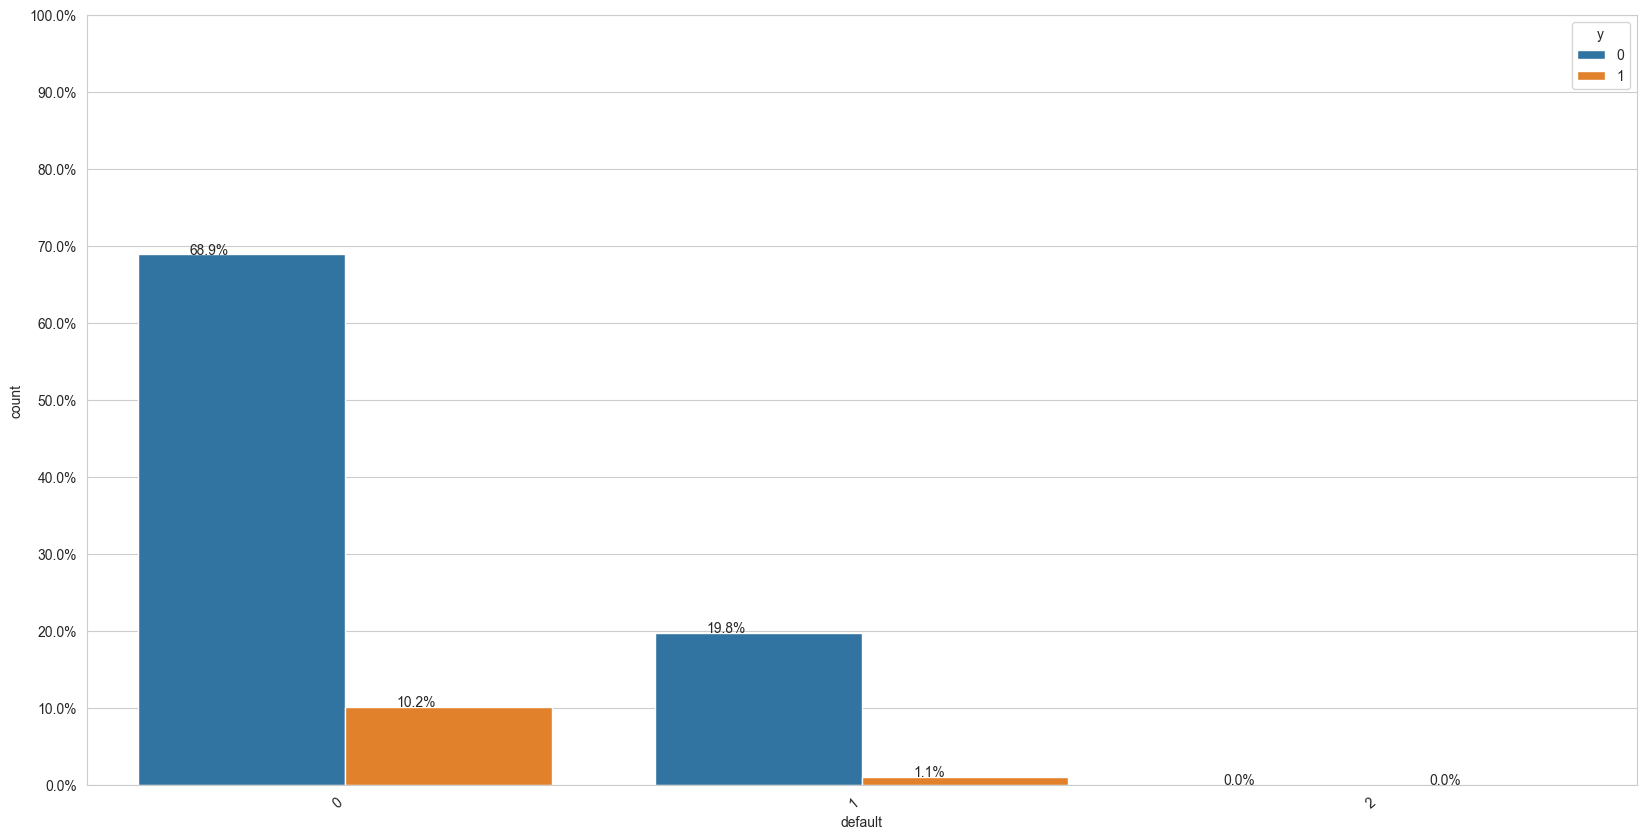

In [26]:
countplot_withY("default", bank_data)

## Feature: Education

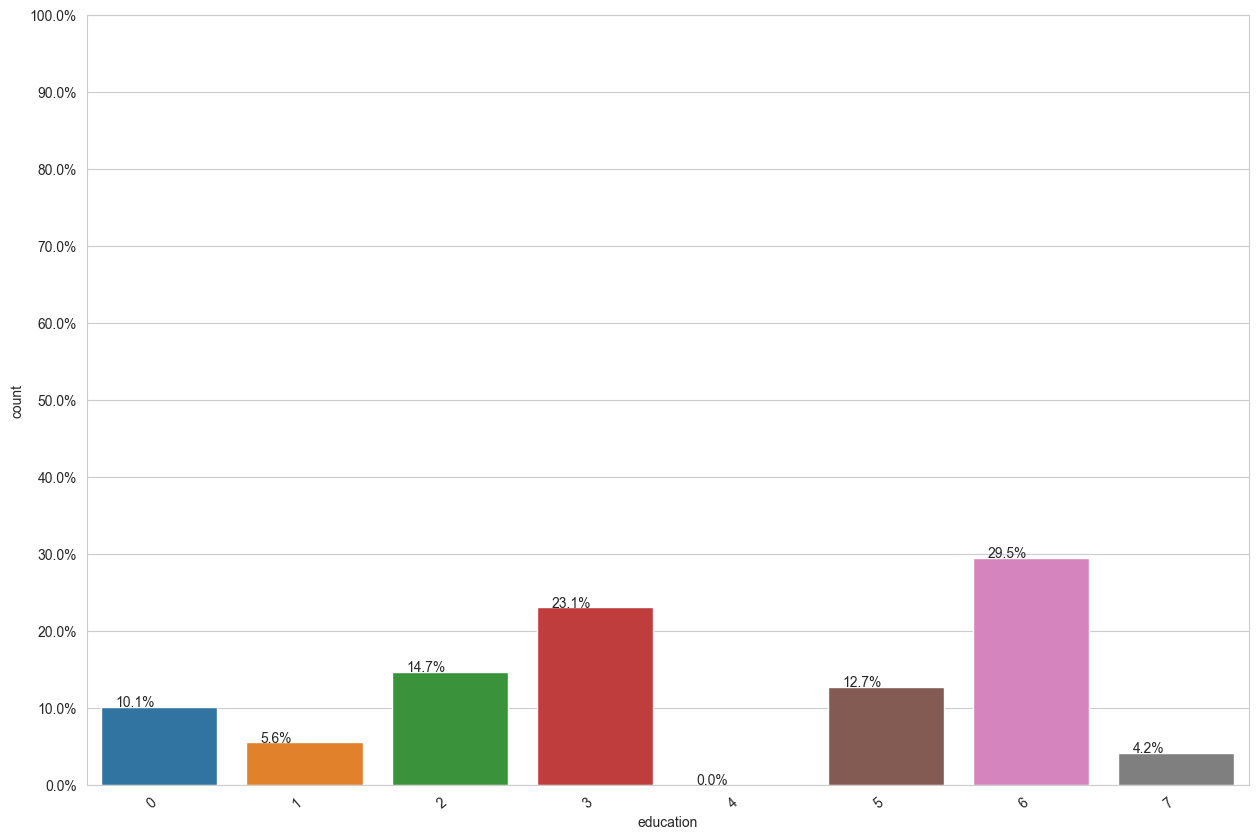

In [27]:
countplot("education",bank_data)

#### The majority of our dataset have a University degree, the next highest group completed high school. None are illiterate and the smallest groups are unknown and basic 6 year.

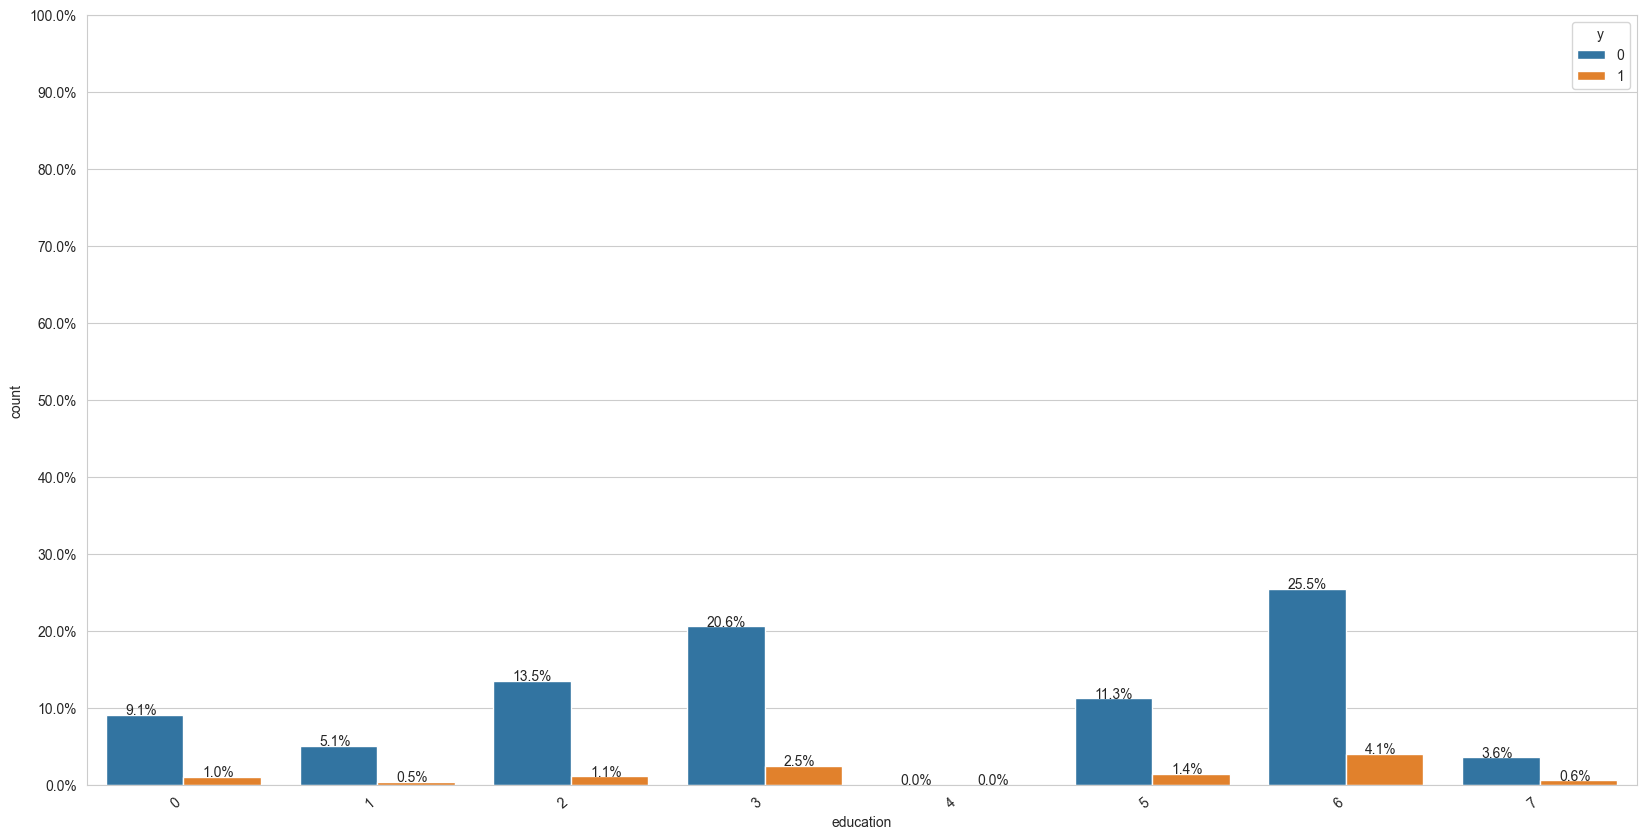

In [28]:
countplot_withY("education", bank_data)

#### Of the persons who do subscribe to the term depost, most tent to have a University degree.

## Feature: Housing

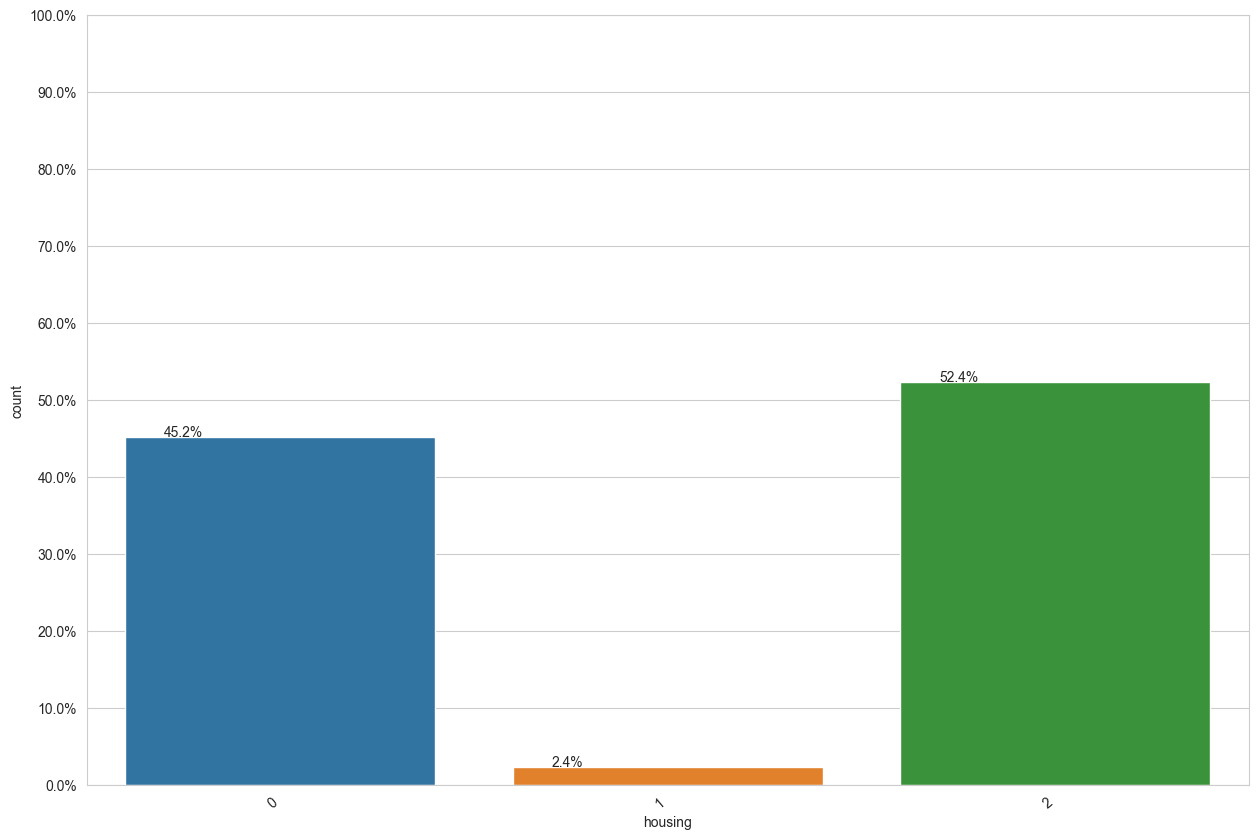

In [29]:
countplot("housing", bank_data)

### Whether or not the person has a housing loan is pretty even.

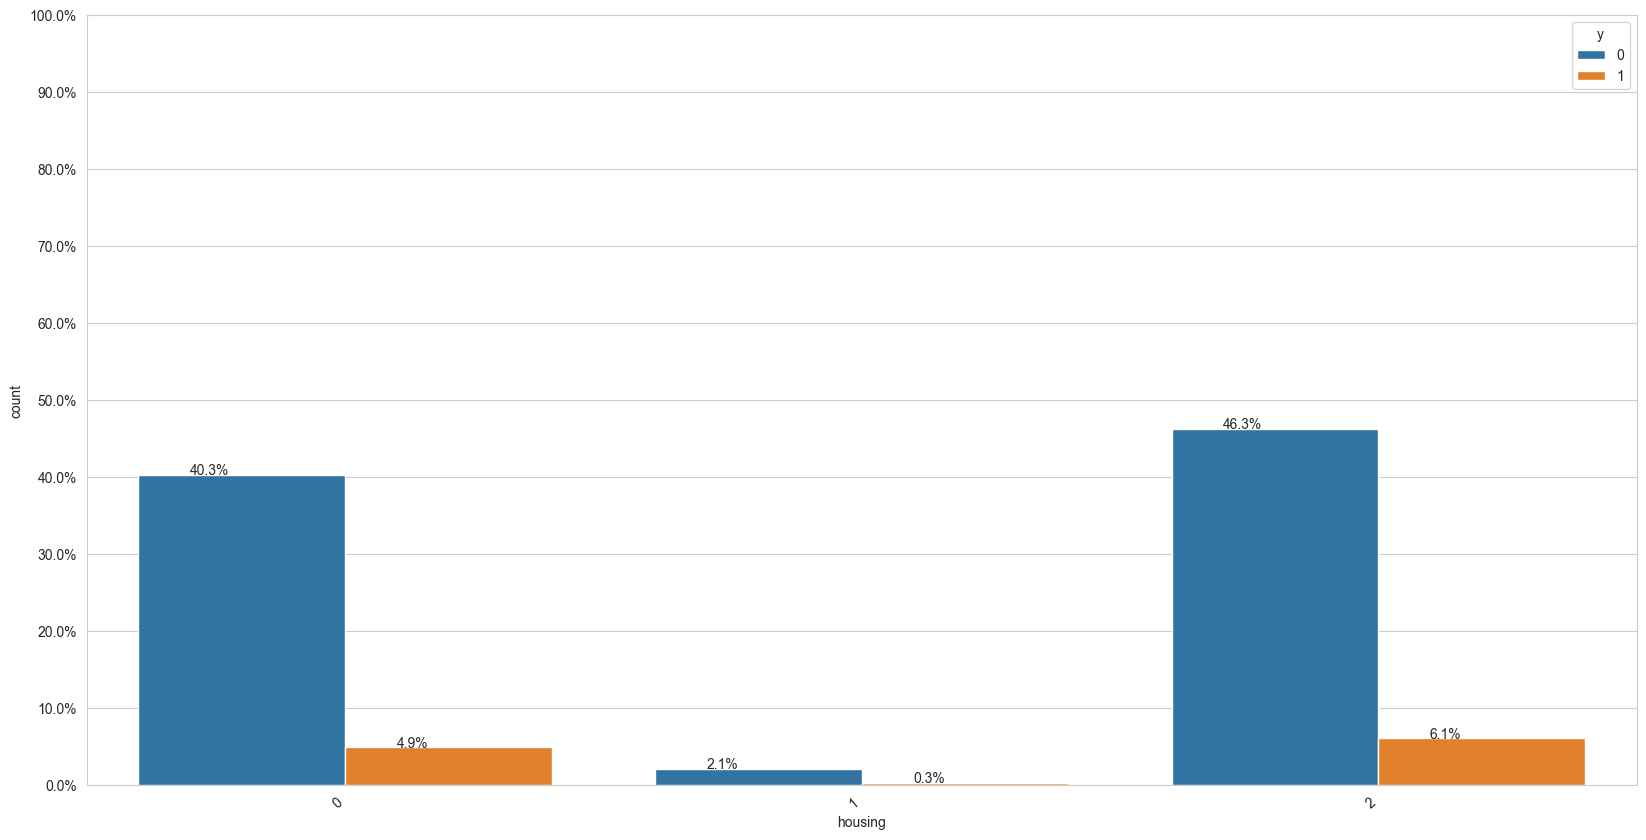

In [30]:
countplot_withY("housing", bank_data)

## Feature: Loan

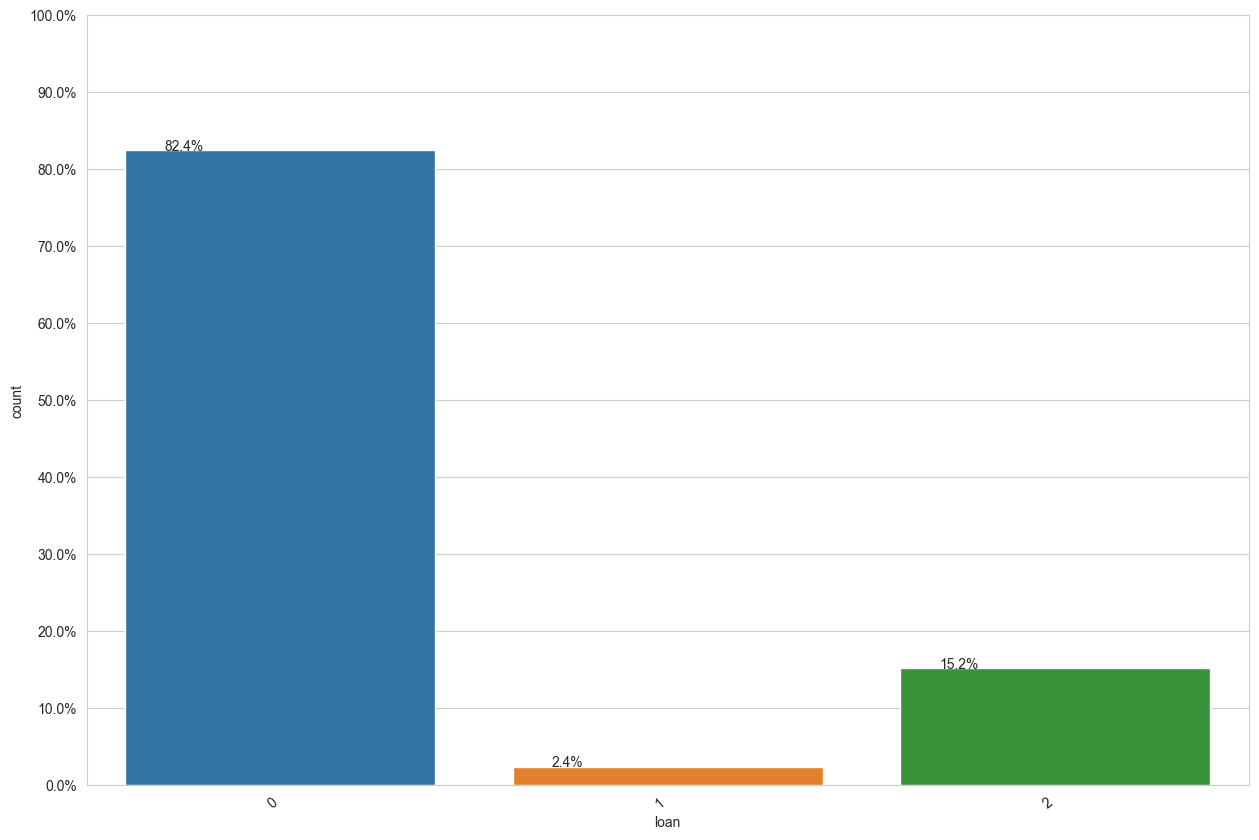

In [31]:
countplot("loan", bank_data)

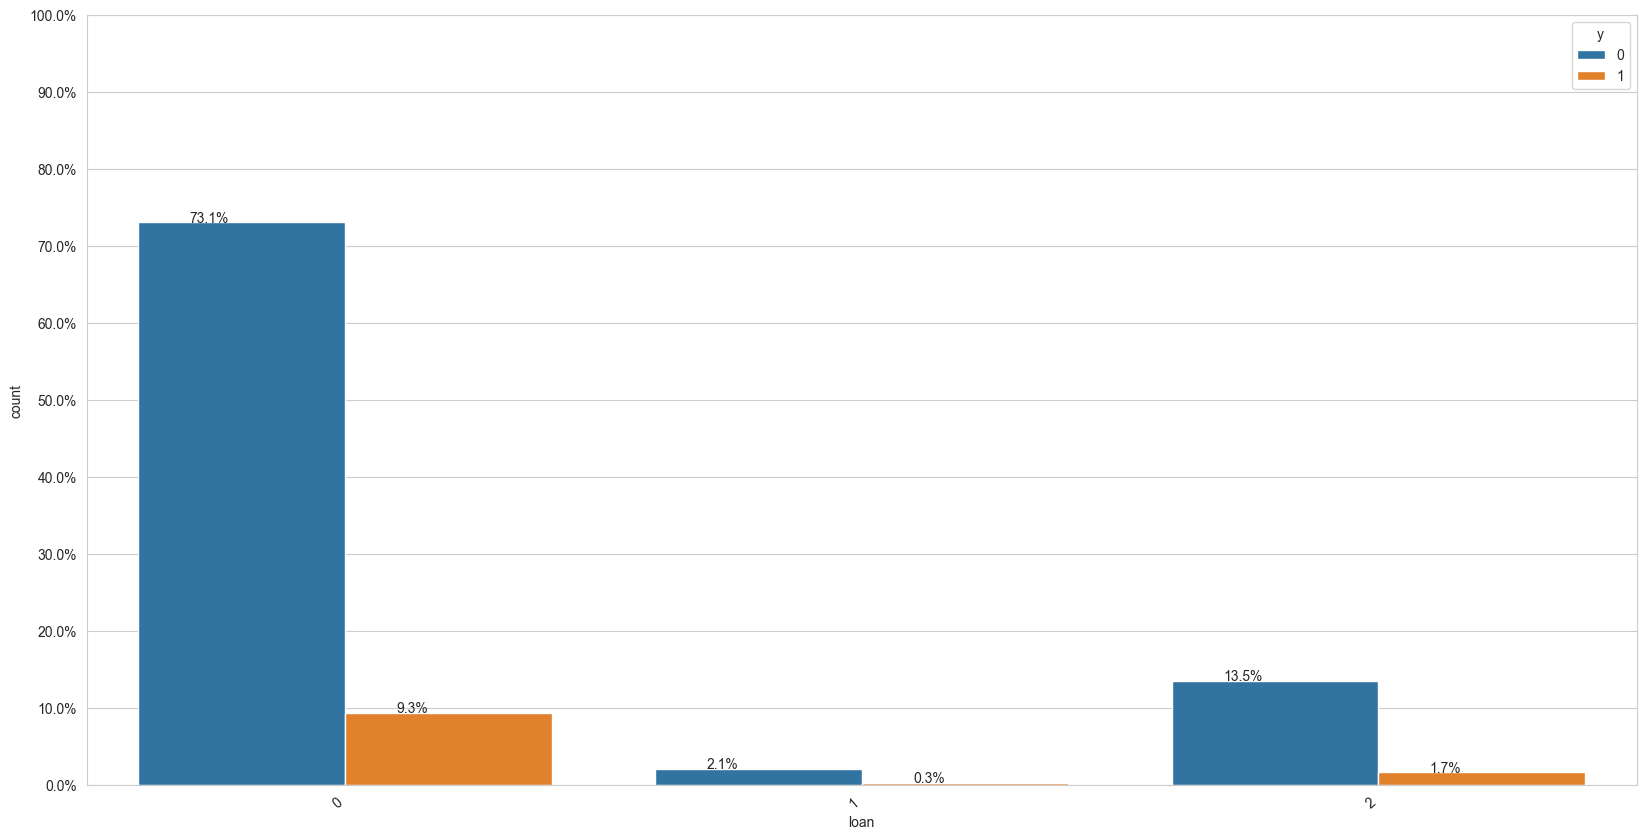

In [32]:
countplot_withY("loan", bank_data)

#### If the person has a personal loan it is higly unlikely they will subscribe to the term deposit. They might be unable/unwilling to take on another commitment and are focusing on paying off/down the personal loan.

## Feature: Contact

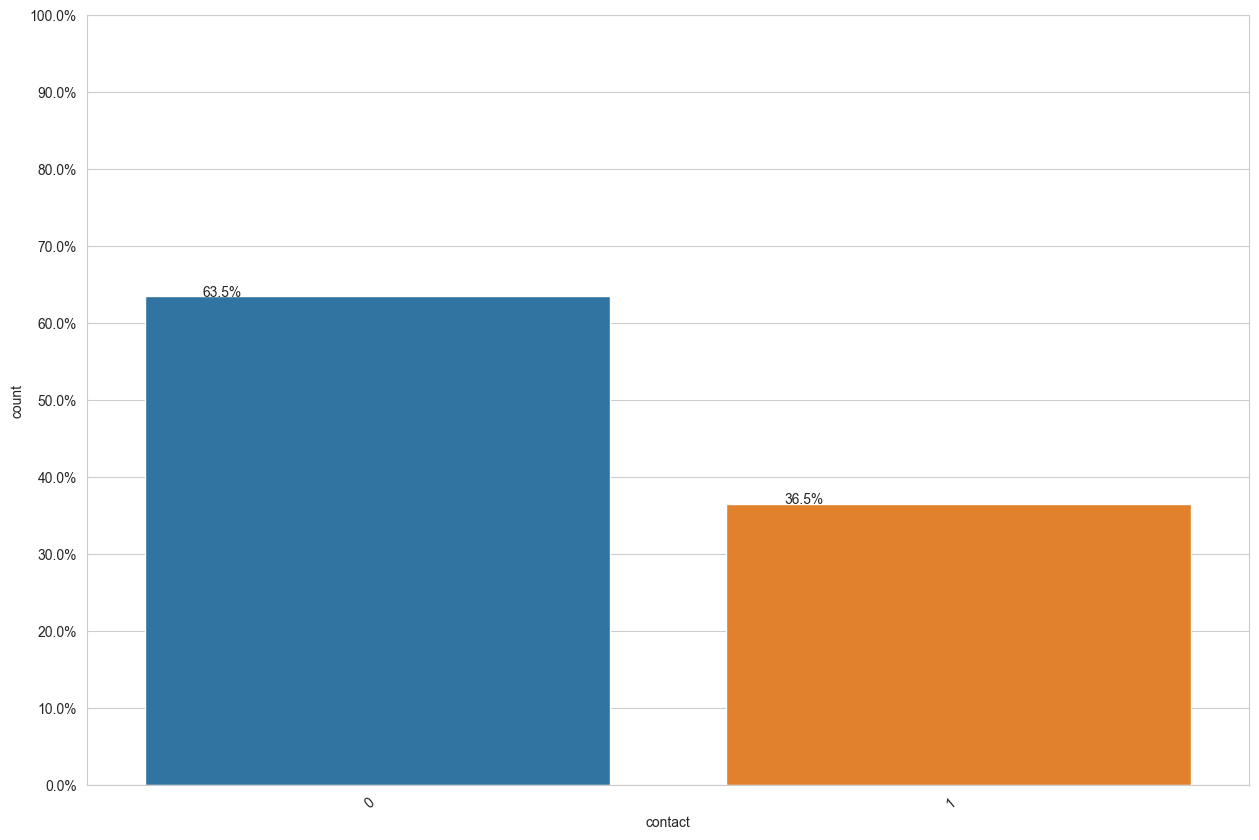

In [33]:
countplot("contact", bank_data)

#### The majority of persons were contacted via cellular phone.

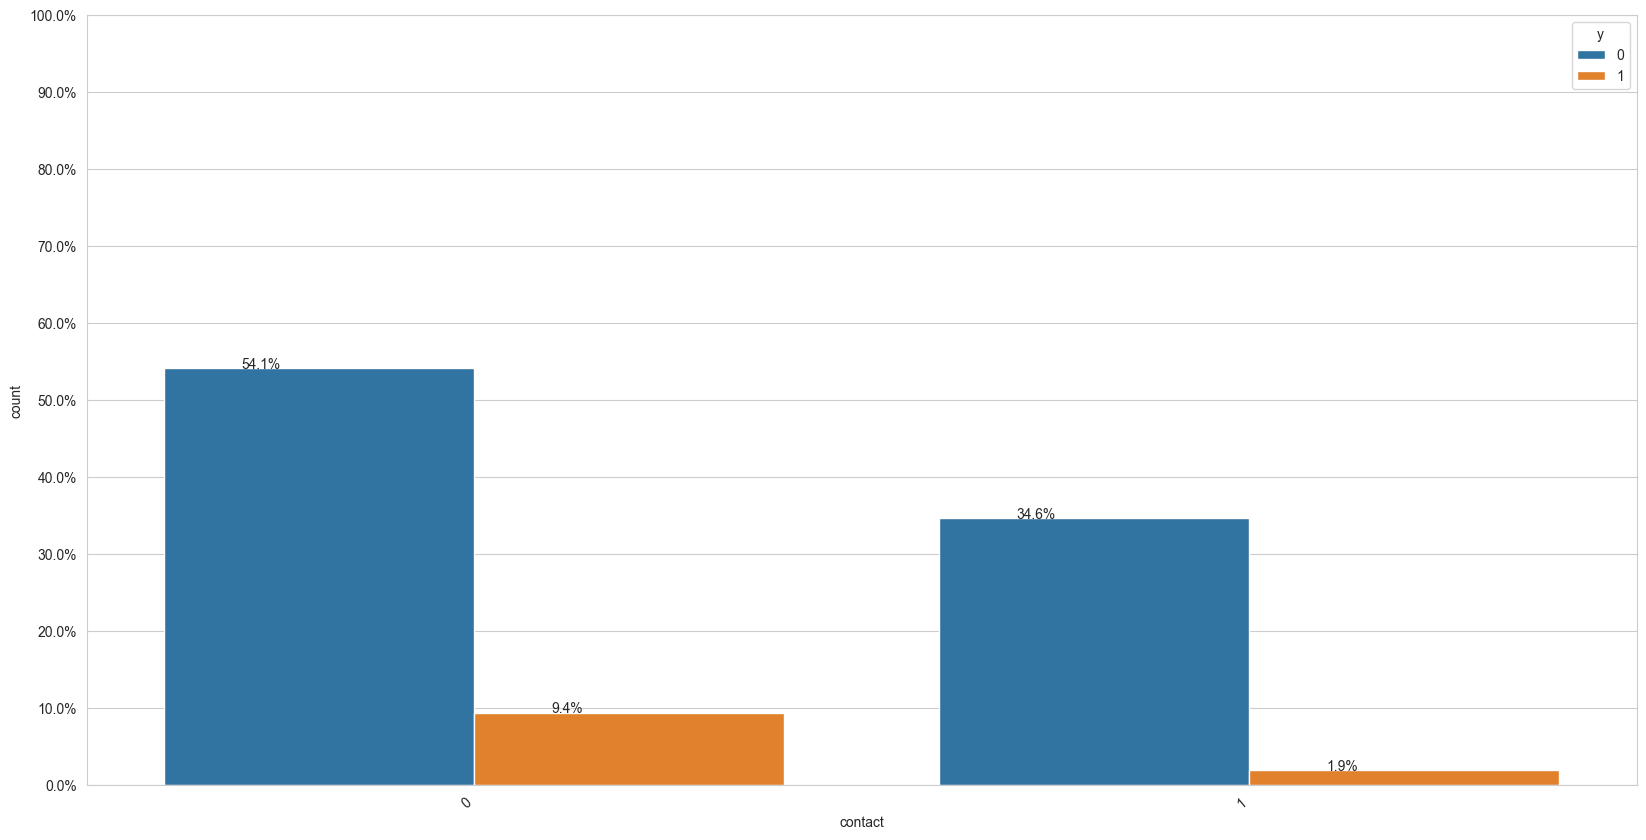

In [34]:
countplot_withY("contact", bank_data)

## Feature: Month

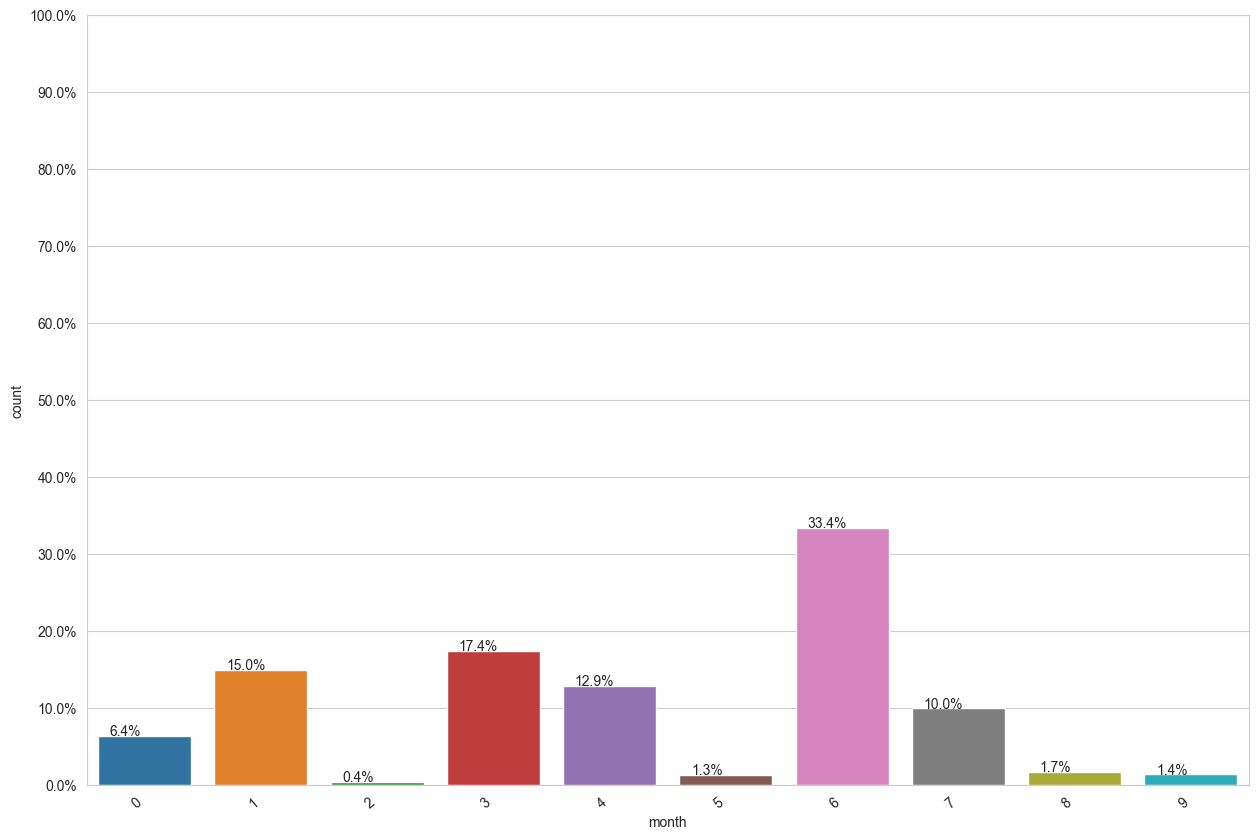

In [35]:
countplot("month", bank_data)

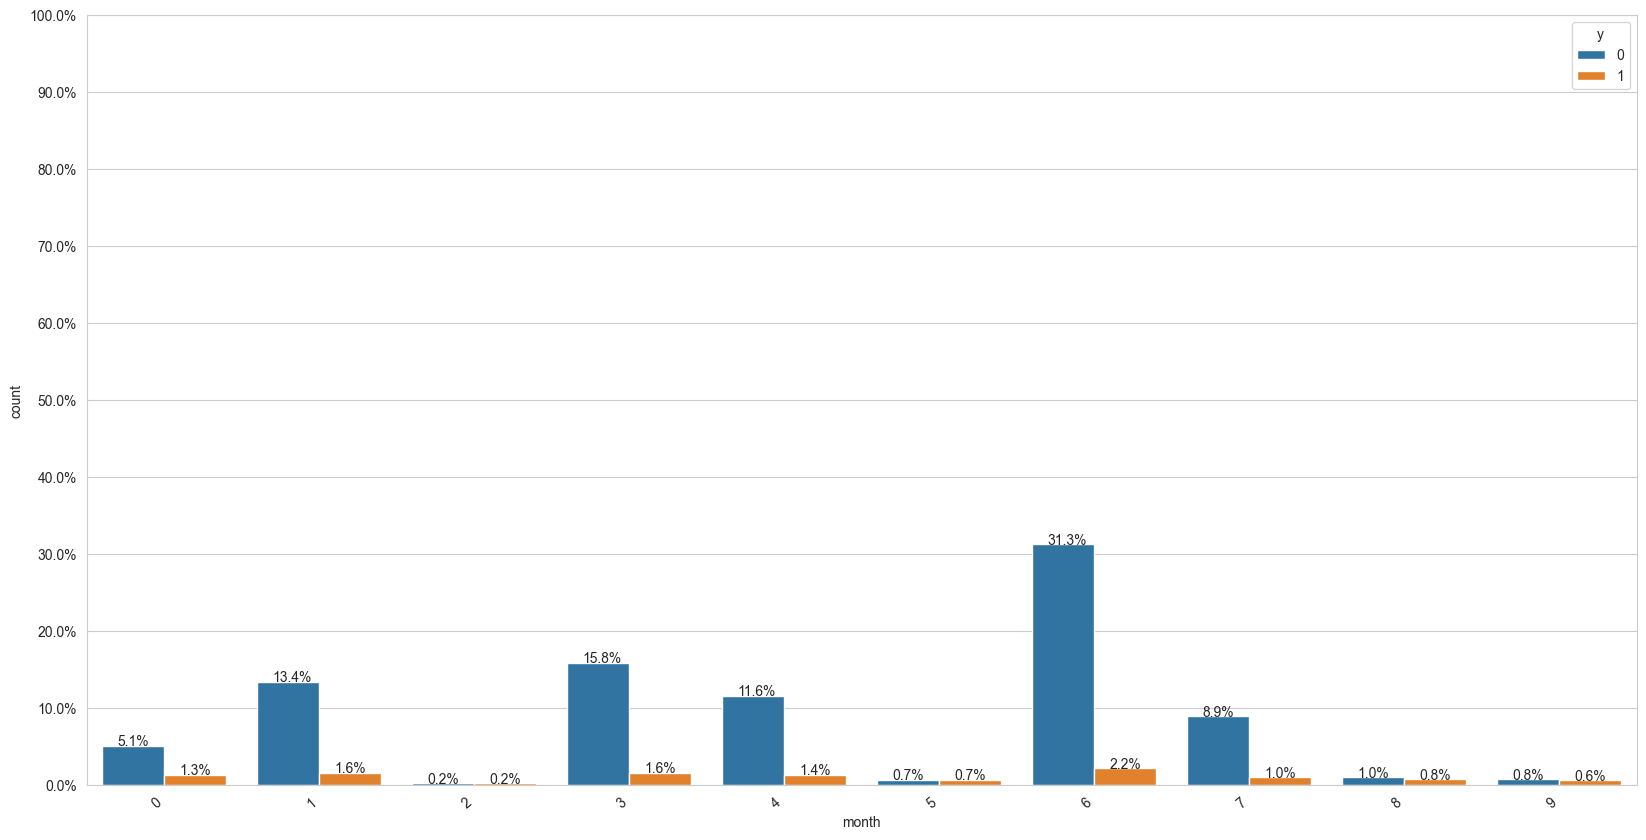

In [36]:
countplot_withY("month", bank_data)

#### Most persons were contacted in May, and it is not surprising that most of the persons who subscribed were also contacted in May.

## Feature: Day of Week

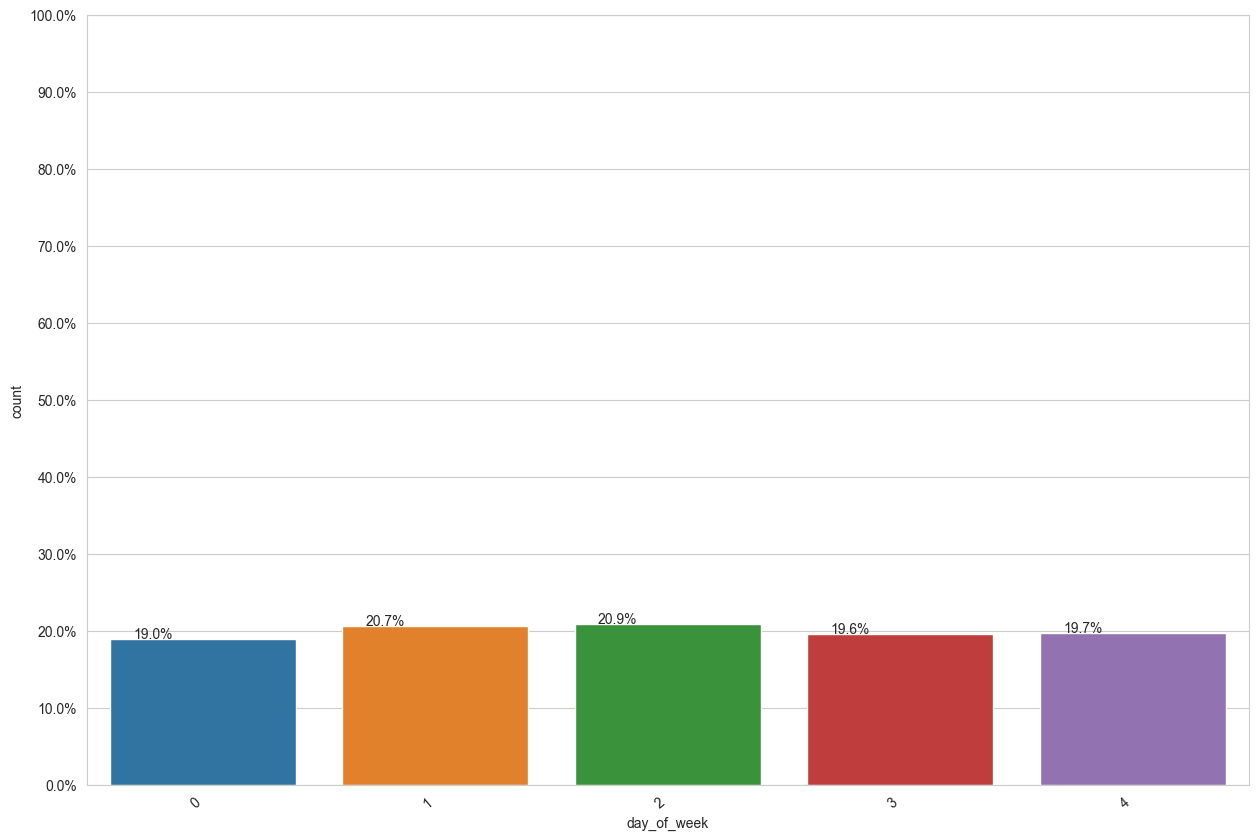

In [37]:
countplot("day_of_week", bank_data)

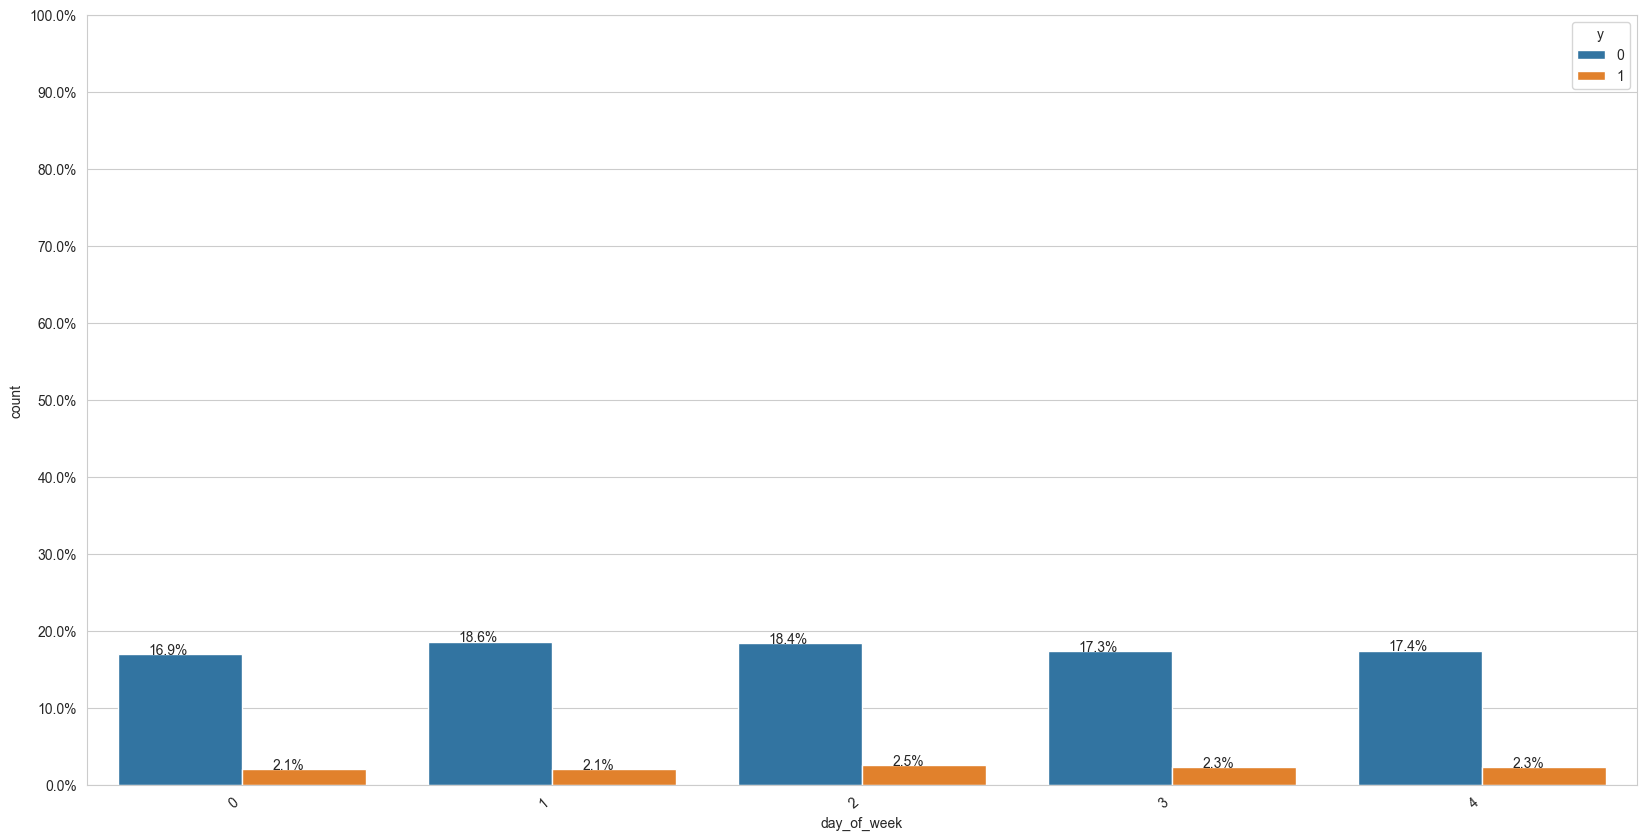

In [38]:
countplot_withY("day_of_week", bank_data)

## Feature: (Previous Marketing Ooutcome)

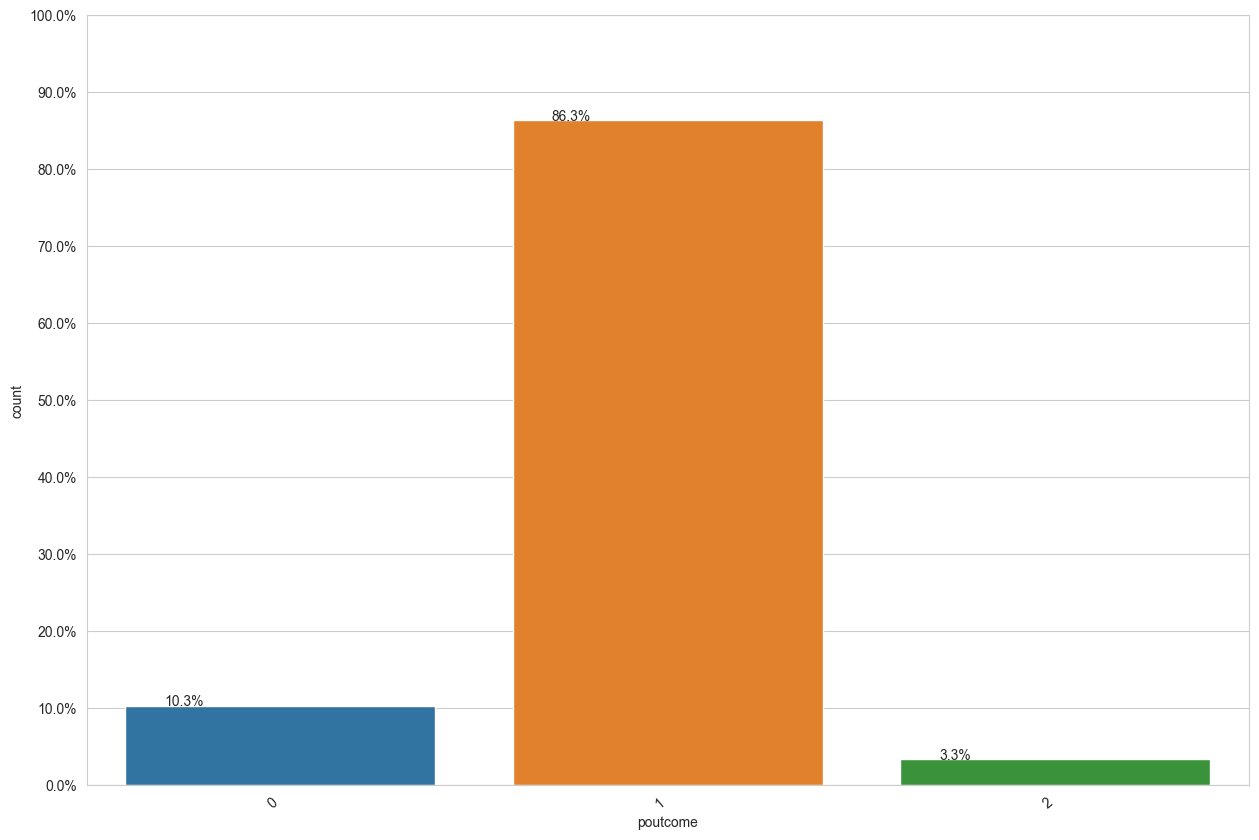

In [39]:
countplot("poutcome", bank_data)

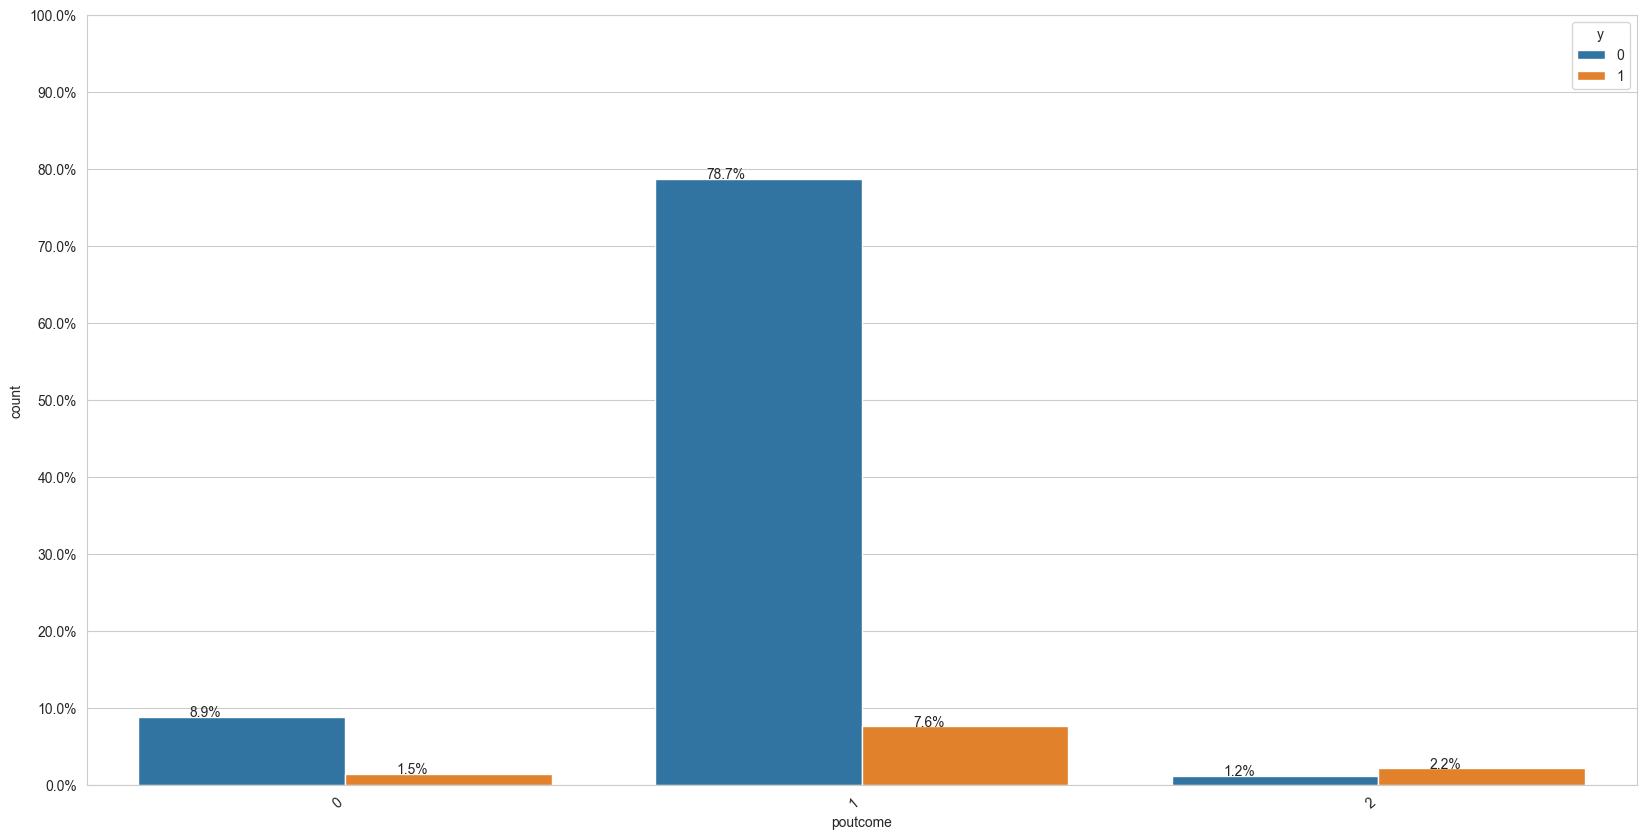

In [40]:
countplot_withY("poutcome", bank_data)

## Feature: (Age)

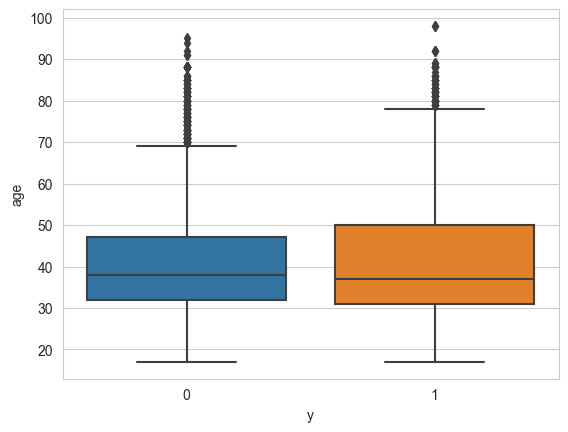

In [41]:
%matplotlib inline
sns.boxplot(data=bank_data, x="y", y="age")
plt.show()

<AxesSubplot: xlabel='age', ylabel='Density'>

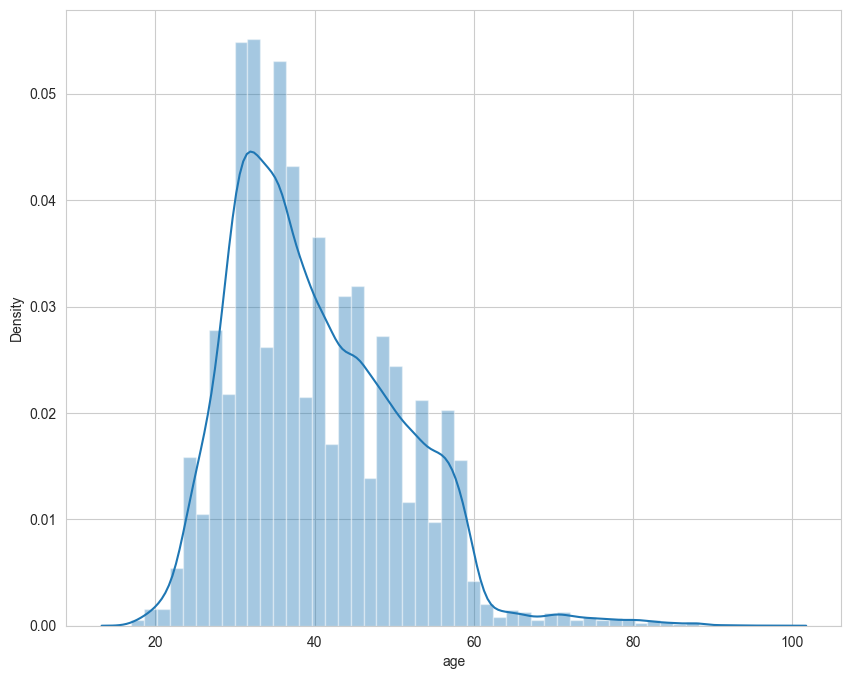

In [42]:
plt.figure(figsize=(10,8))
sns.distplot(bank_data["age"])

### Feature: (Duration)

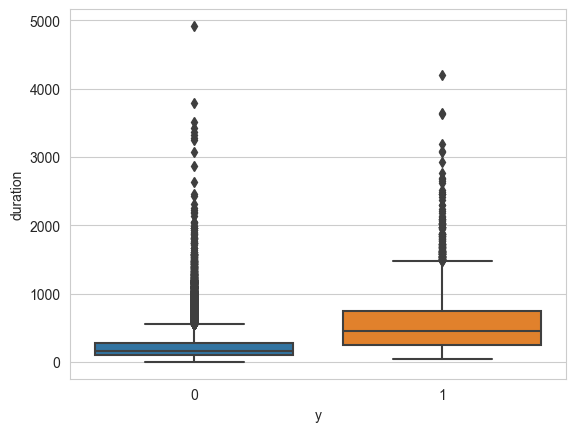

In [43]:
%matplotlib inline
sns.boxplot(data=bank_data, x="y", y="duration")
plt.show()

#### As was already mentioned in the project overview, this field highly affects the target variable and should only be used for benchmark purposes.

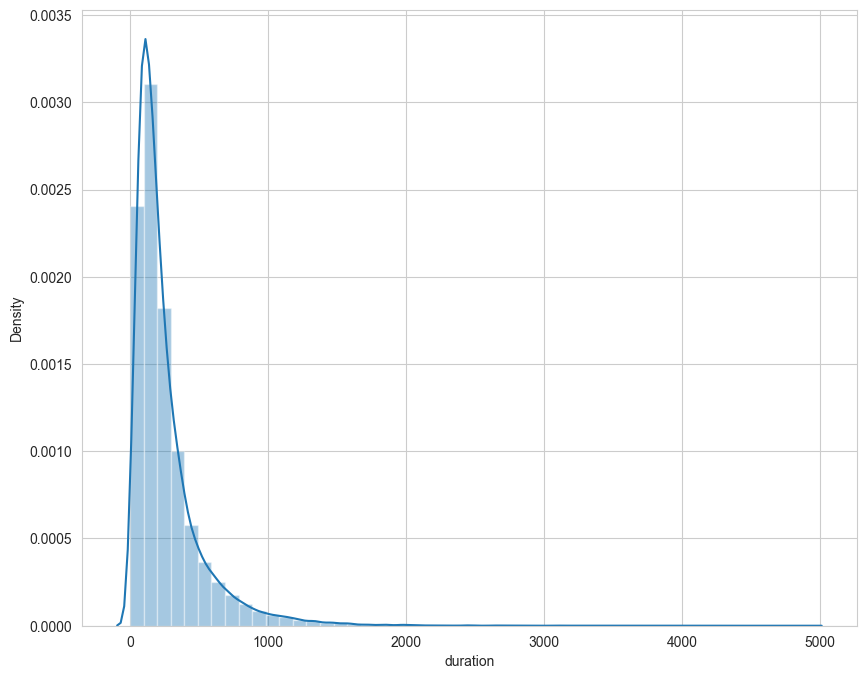

In [44]:
plt.figure(figsize=(10,8))
sns.distplot(bank_data["duration"])
plt.show()

## Feature: (Campaign)

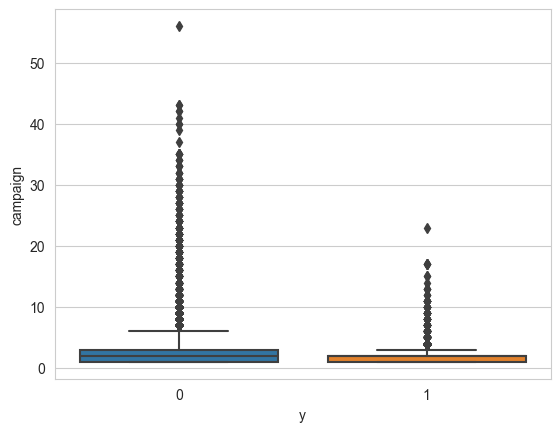

In [45]:
%matplotlib inline
sns.boxplot(data=bank_data, x="y", y="campaign")
plt.show()

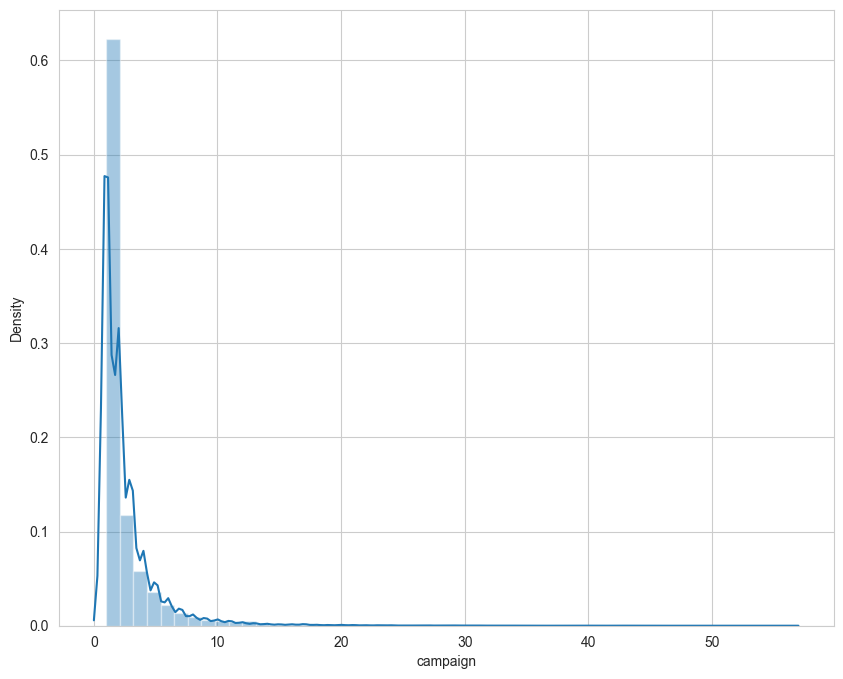

In [46]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(bank_data["campaign"])
plt.show()

## Feature (Pdays)

In [47]:
bank_data["pdays"].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [48]:
bank_data["pdays"].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

### Most of the values are 999, which means that the most of the customers have never been contacted before.

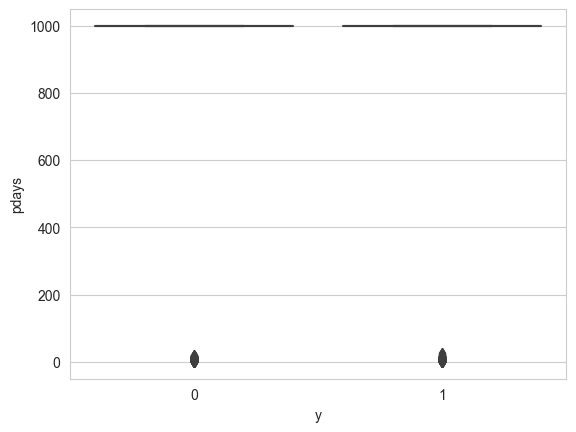

In [49]:
%matplotlib inline
sns.boxplot(data=bank_data, x="y", y="pdays")
plt.show()

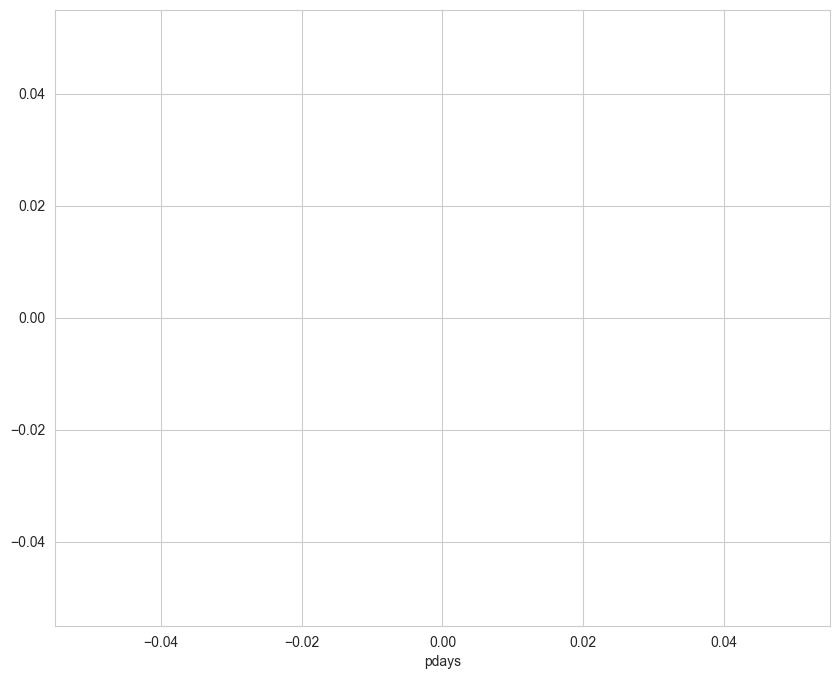

In [50]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(bank_data[bank_data["y"]=="yes"]["pdays"])
sns.distplot(bank_data[bank_data["y"]=="no"]["pdays"])
plt.show()

## Feature (Previous)

In [51]:
bank_data["previous"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [52]:
bank_data["previous"].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [53]:
bank_data[bank_data["y"]=="yes"]["previous"].value_counts()

Series([], Name: previous, dtype: int64)

In [54]:
bank_data[bank_data["y"]=="no"]["previous"].value_counts()

Series([], Name: previous, dtype: int64)

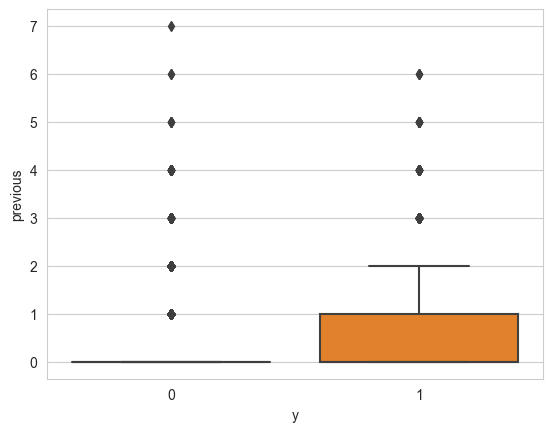

In [55]:
%matplotlib inline
sns.boxplot(data=bank_data, x="y", y="previous")
plt.show()

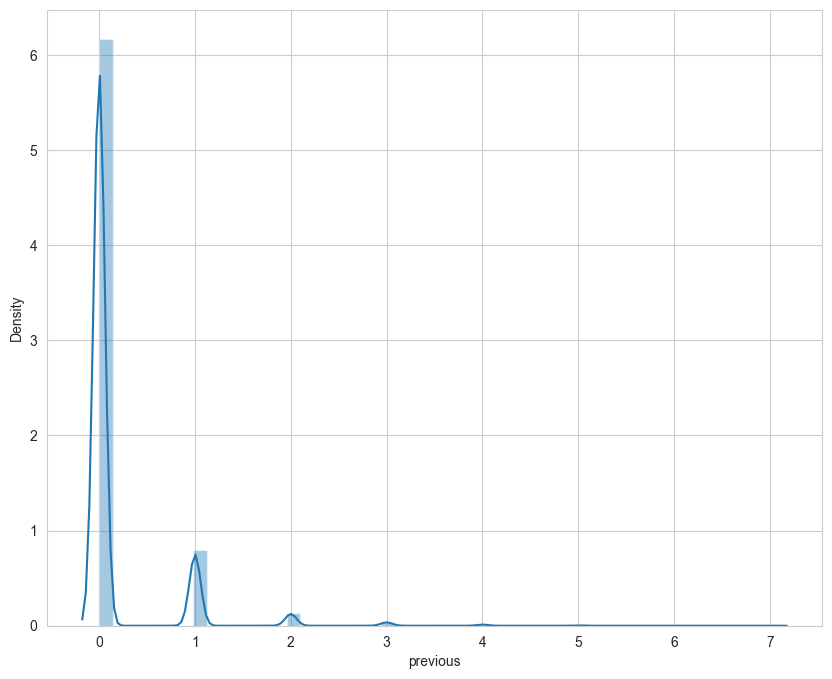

In [56]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(bank_data["previous"])
plt.show()

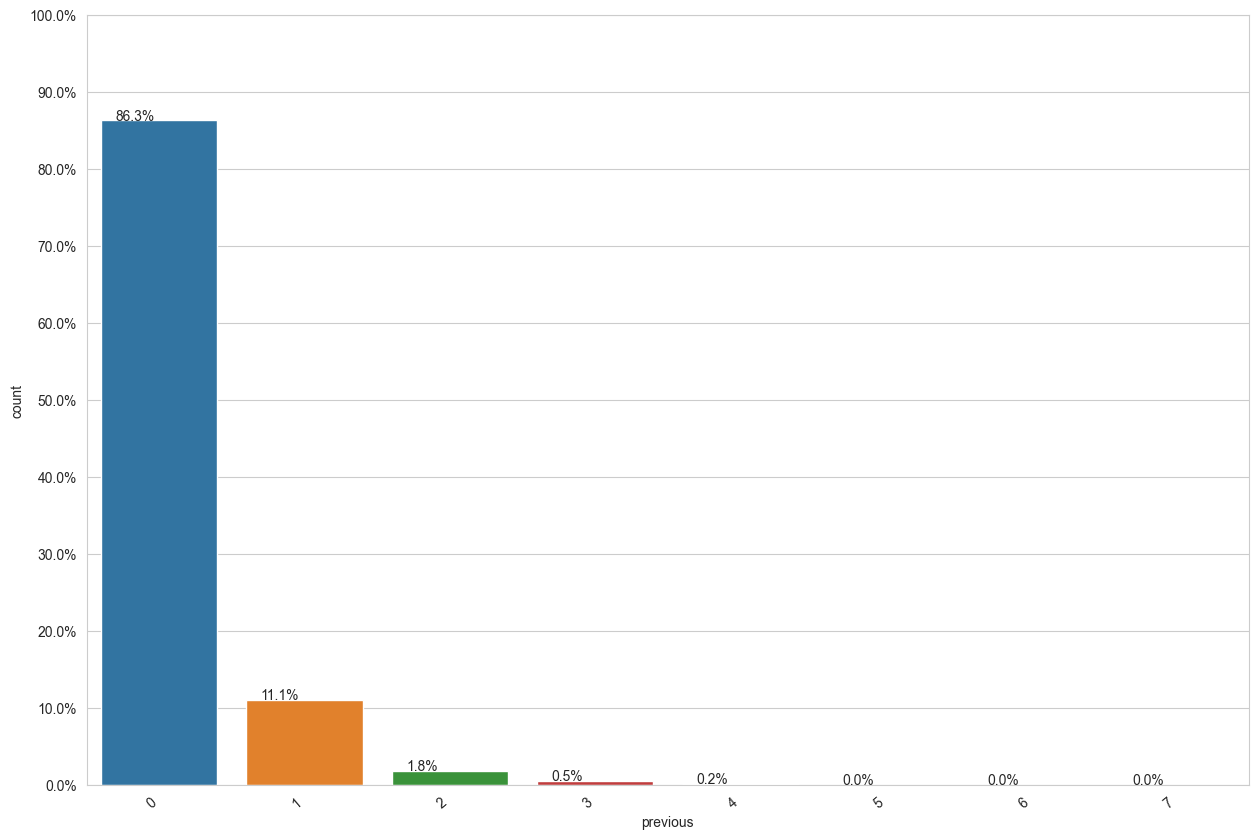

In [57]:
countplot("previous", bank_data)

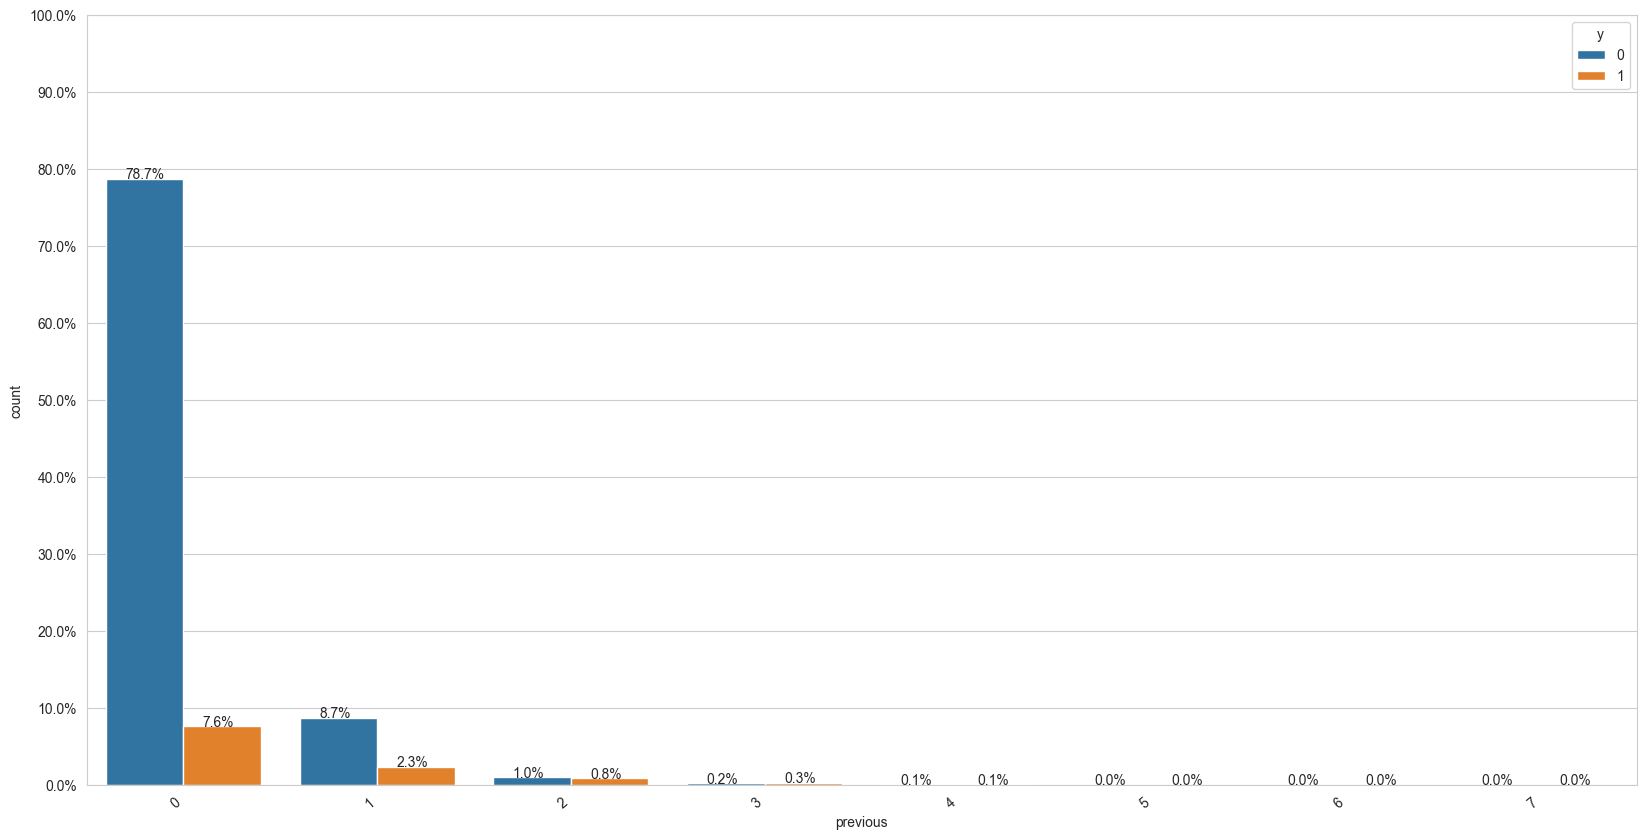

In [58]:
countplot_withY("previous", bank_data)

## Feature: (emp.var.rate)

In [59]:
bank_data["emp.var.rate"].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

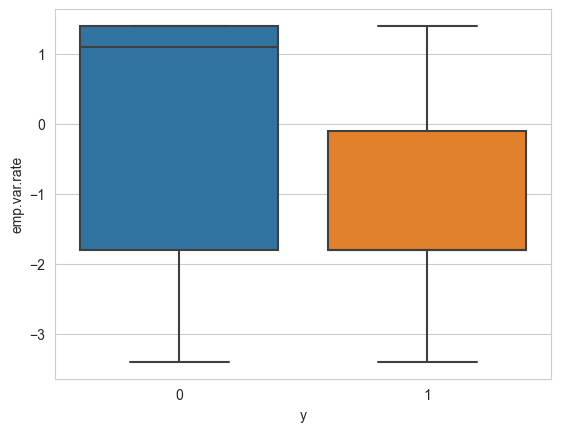

In [60]:
%matplotlib inline
sns.boxplot(data=bank_data, x="y", y="emp.var.rate")
plt.show()

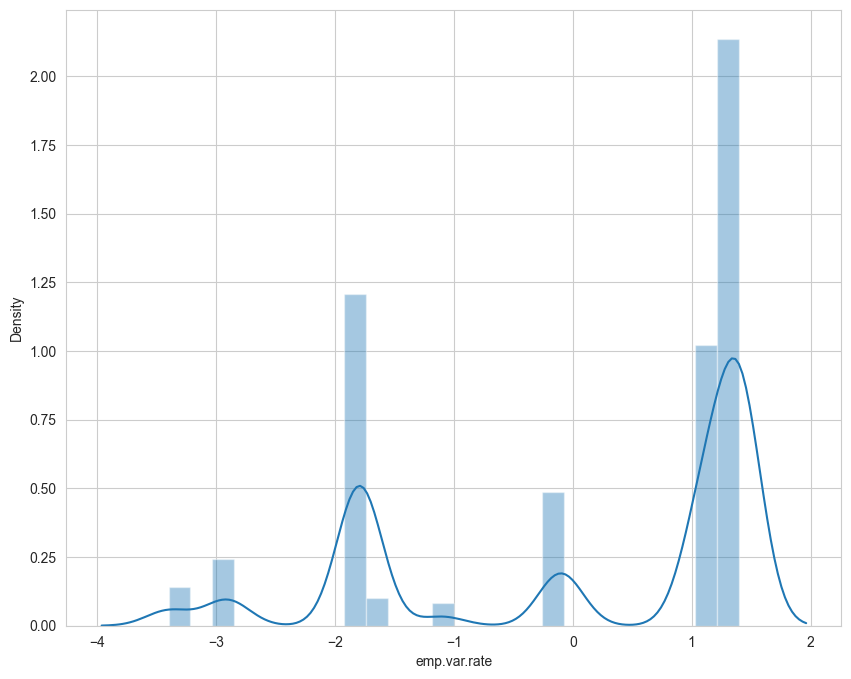

In [61]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(bank_data["emp.var.rate"])
plt.show()

## Feature: (cons.price.idx)

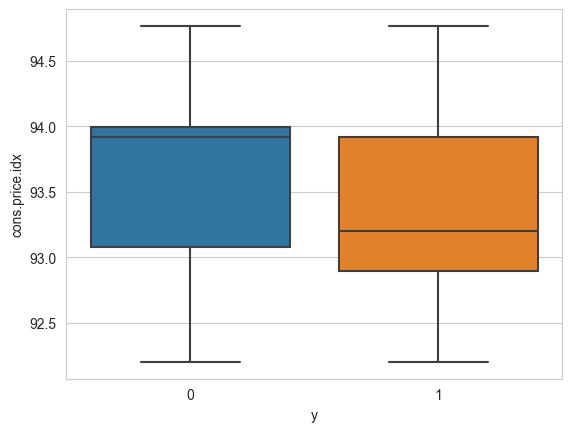

In [62]:
%matplotlib inline
sns.boxplot(data=bank_data, x="y", y="cons.price.idx")
plt.show()

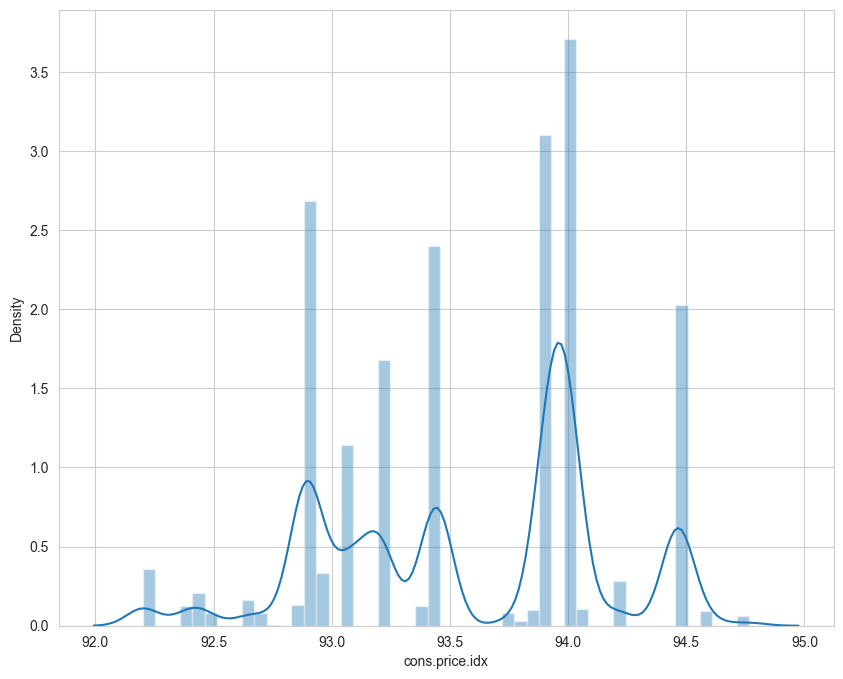

In [63]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(bank_data["cons.price.idx"])
plt.show()

## Feature (cons.conf.idx)

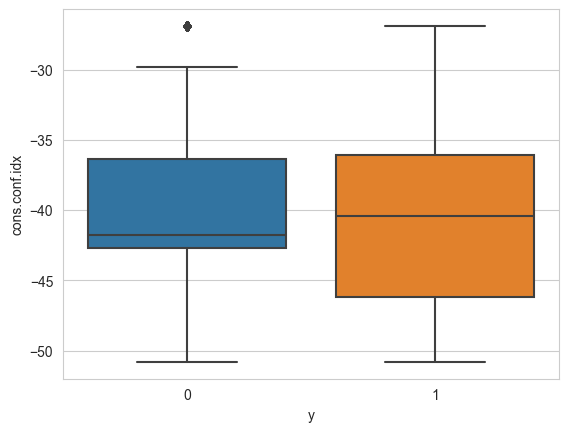

In [64]:
%matplotlib inline
sns.boxplot(data=bank_data, x="y", y="cons.conf.idx")
plt.show()

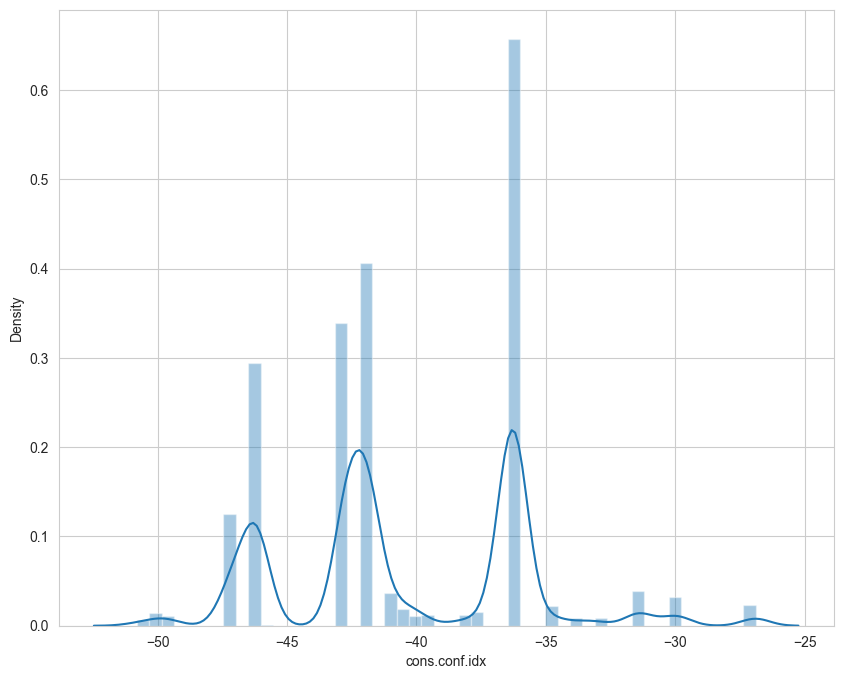

In [65]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(bank_data["cons.conf.idx"])
plt.show()

## Feature: (euribor3m)

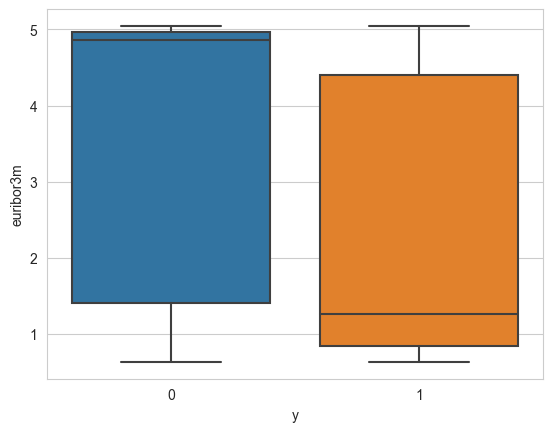

In [66]:
%matplotlib inline
sns.boxplot(data=bank_data, x="y", y="euribor3m")
plt.show()

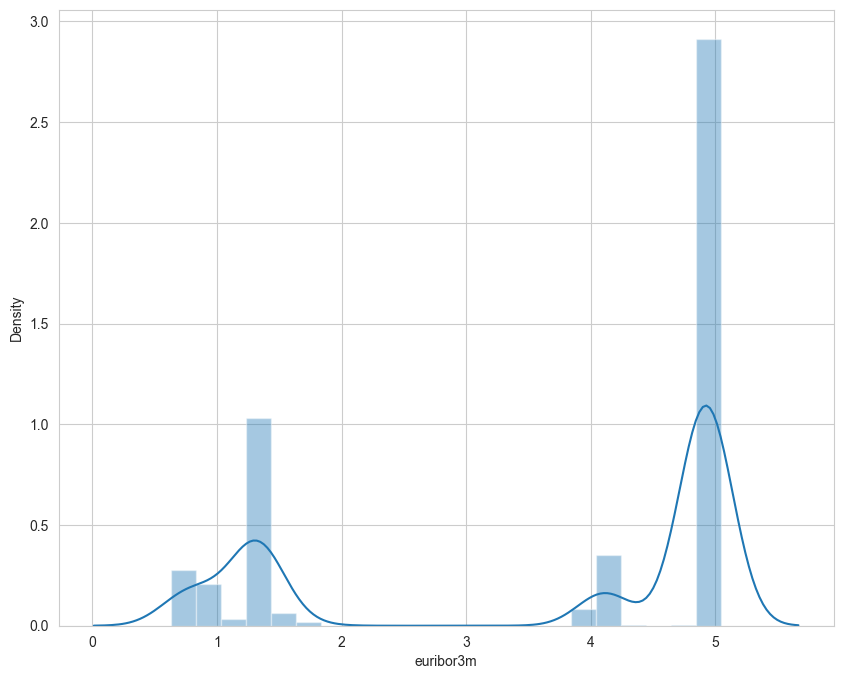

In [67]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(bank_data["euribor3m"])
plt.show()

## Feature: (nr.employed)

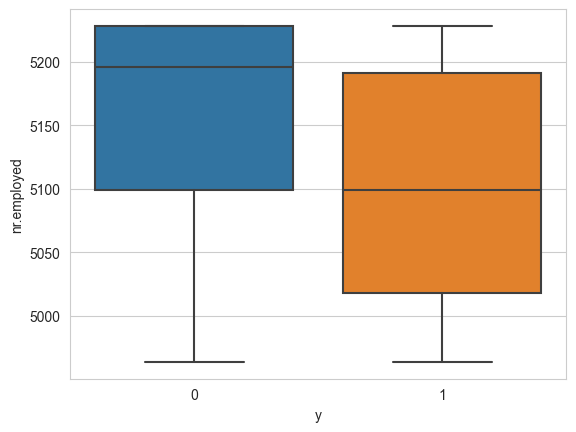

In [68]:
%matplotlib inline
sns.boxplot(data=bank_data, x="y", y="nr.employed")
plt.show()

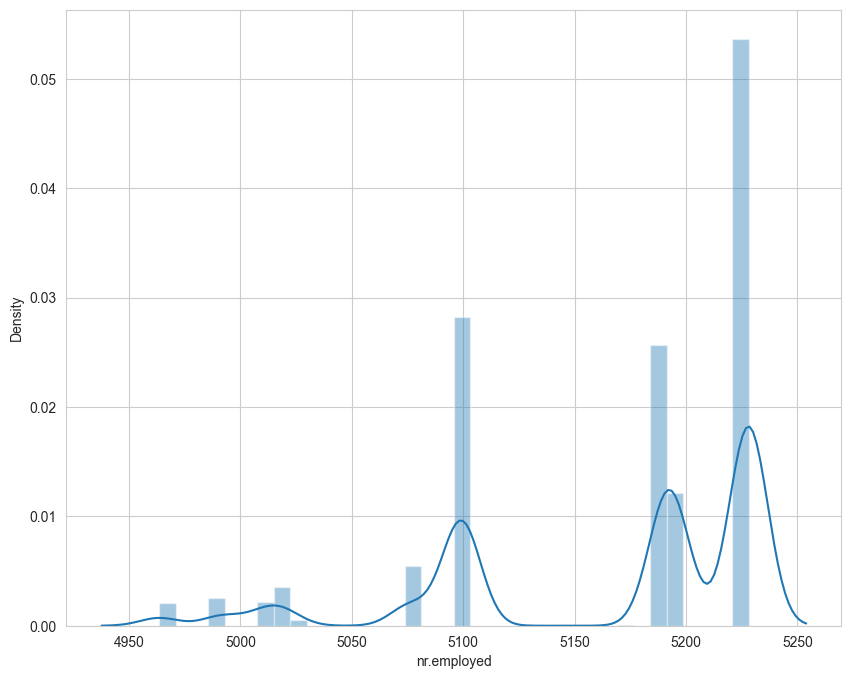

In [69]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(bank_data["nr.employed"])
plt.show()

## Dealing with Duplicate Data

In [70]:
data_dup = bank_data[bank_data.duplicated(keep="last")]
data_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,1,1,1,0,0,0,1,6,2,...,1,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
12260,36,5,1,7,0,0,0,1,3,2,...,1,999,0,1,1.4,93.918,-42.7,4.966,5228.1,0
14155,27,9,2,5,0,0,0,0,3,1,...,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0
16819,47,9,0,3,0,2,0,0,3,2,...,3,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0
18464,32,9,2,5,0,2,0,0,3,2,...,1,999,0,1,1.4,93.918,-42.7,4.968,5228.1,0
20072,55,7,1,3,1,0,0,0,1,1,...,1,999,0,1,1.4,93.444,-36.1,4.965,5228.1,0
20531,41,9,1,5,0,2,0,0,1,3,...,1,999,0,1,1.4,93.444,-36.1,4.966,5228.1,0
25183,39,0,1,6,0,0,0,0,7,3,...,2,999,0,1,-0.1,93.200,-42.0,4.153,5195.8,0
28476,24,7,2,3,0,2,0,0,0,3,...,1,999,0,1,-1.8,93.075,-47.1,1.423,5099.1,0
32505,35,0,1,6,0,2,0,0,6,0,...,4,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0


In [71]:
data_dup.shape

(12, 21)

#### We have 12 duplicate rows and will drop these before proceeding.

In [72]:
bank_data = bank_data.drop_duplicates()
bank_data.shape

(41176, 21)

## Data Analysis

#### Use boxplot to check for outliers in the dataset

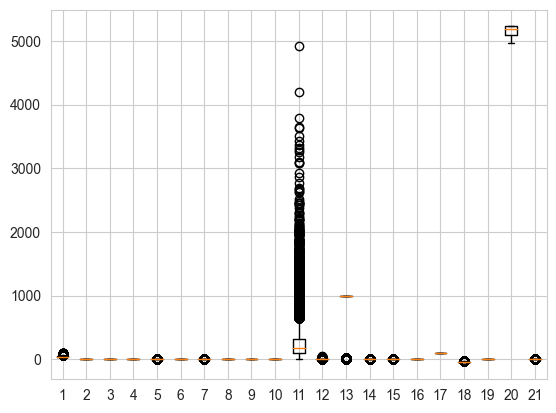

<Figure size 1000x1000 with 0 Axes>

In [73]:
plt.boxplot(bank_data)
fig = plt.figure(figsize =(10, 10))
plt.show()

### There only seems to be outliers in the duration feature which, as noted before, should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

<AxesSubplot: >

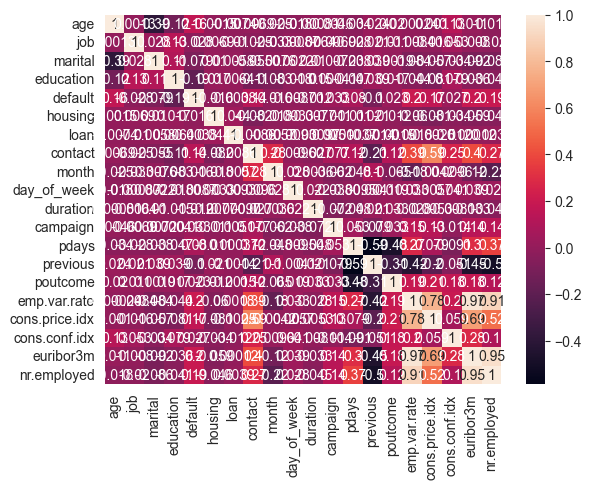

In [74]:
# Correlation/Heat Map
sns.heatmap(bank_data.drop('y',axis=1).corr(),annot=True)

<AxesSubplot: >

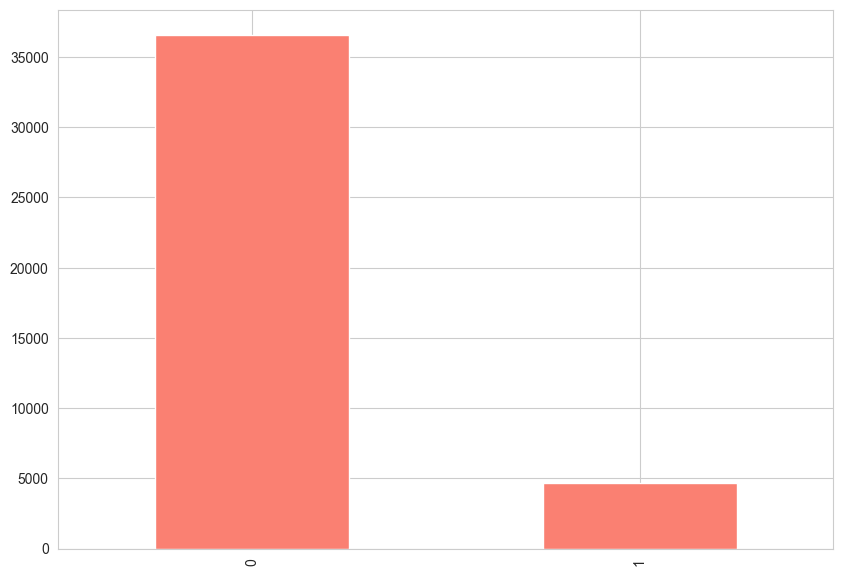

In [75]:
# Distribution of target feature
plt.figure(figsize=(10,7))
bank_data.y.value_counts().plot(kind="bar", color = ['Salmon'])

#### Most of the customers do not sign up for the term deposit.

In [76]:
# Check one last time for NaN values
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### We can now proceed to selecting our models to solve the business problem.

### Define X and y Variables for the different models

In [77]:
# Define X
X=bank_data.drop(labels=['y', 'duration'], axis=1)
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [78]:
# Define y
y=bank_data.y
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41176, dtype: int32

#### Model 1 (Logistic Regression)

In [79]:
# Scaling the data as all features seems to be near to normal distribution
from sklearn.preprocessing import StandardScaler

# Object creation
scalar = StandardScaler()

# Scaling independent variables
X_scaled = scalar.fit_transform(X)

In [80]:
# Scaled data
X_scaled

array([[ 1.53314313, -0.20147477, -0.28370335, ...,  0.88656813,
         0.71246263,  0.33169507],
       [ 1.62910732,  0.9113627 , -0.28370335, ...,  0.88656813,
         0.71246263,  0.33169507],
       [-0.29017656,  0.9113627 , -0.28370335, ...,  0.88656813,
         0.71246263,  0.33169507],
       ...,
       [ 1.53314313,  0.35494396, -0.28370335, ..., -2.22505906,
        -1.49519696, -2.81568858],
       [ 0.3815728 ,  1.46778143, -0.28370335, ..., -2.22505906,
        -1.49519696, -2.81568858],
       [ 3.26049862,  0.35494396, -0.28370335, ..., -2.22505906,
        -1.49519696, -2.81568858]])

In [81]:
# Creating training and testing data
# Splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25,random_state = 355)

In [82]:
# Model Creation
from sklearn.linear_model import LogisticRegression

# Object creation of logistic regression
log_reg = LogisticRegression()

# Training model with training data
log_reg.fit(x_train,y_train)

LogisticRegression()

In [83]:
# Predicting y_train
y_train_pre=log_reg.predict(x_train)

In [84]:
y_train_pre

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
# Testing the model
y_pred = log_reg.predict(x_test)

In [86]:
# Calculate the accuracy of the model.
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report

# Model traning accuracy
accuracy = accuracy_score(y_train,y_train_pre)
accuracy

0.9001360015543035

In [87]:
test_accuracy=accuracy_score(y_test,y_pred)
test_accuracy

0.8998445696522246

In [89]:
# Precision on testing

# The number of true positives divided by the total number of positive prediction
Precision = precision_score(y_test,y_pred)
Precision

0.6842105263157895

In [90]:
# Recall on testing

# The total number of positive results how many positives were correctly predicted by the model.
Recall = recall_score(y_test,y_pred)
Recall

0.2220324508966695

In [91]:
# F1 Score

# When precision and recall both are important
F1_Score = f1_score(y_test,y_pred)
F1_Score

0.33526756931012247

In [92]:
# Confusion matrix
pd.crosstab(y_test, y_pred)

col_0,0,1
y,,
0,9003,120
1,911,260


In [93]:
# Generate a report on the precision, recall, F1 scores and accuracy (of the model).
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9123
           1       0.68      0.22      0.34      1171

    accuracy                           0.90     10294
   macro avg       0.80      0.60      0.64     10294
weighted avg       0.88      0.90      0.88     10294



## ROC Plot

In [94]:
# Prediciting the probabilities of Class 1
probs=log_reg.predict_proba(x_test)[:,1]

In [95]:
probs

array([0.07221407, 0.12271089, 0.12311843, ..., 0.04476802, 0.47357071,
       0.10565231])

In [96]:
# Define the threshold limit
def predict_threshold (model,X_test,thresholds):
    # Checking where probability of Class 1 is greater than threshold
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0)

In [97]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1): # Create matrix/array from range 0 to 1 with step 0.1
    y_predict = predict_threshold(log_reg,x_test,thr) # Check result for each threshold from 0 to 0.1
    print("Threshold :",thr) # Print the threshold
    print(confusion_matrix(y_test,y_pred)) # Confusion Matrix for each prediction

Threshold : 0.0
[[9003  120]
 [ 911  260]]
Threshold : 0.1
[[9003  120]
 [ 911  260]]
Threshold : 0.2
[[9003  120]
 [ 911  260]]
Threshold : 0.30000000000000004
[[9003  120]
 [ 911  260]]
Threshold : 0.4
[[9003  120]
 [ 911  260]]
Threshold : 0.5
[[9003  120]
 [ 911  260]]
Threshold : 0.6000000000000001
[[9003  120]
 [ 911  260]]
Threshold : 0.7000000000000001
[[9003  120]
 [ 911  260]]
Threshold : 0.8
[[9003  120]
 [ 911  260]]
Threshold : 0.9
[[9003  120]
 [ 911  260]]


In [98]:
# Visualizing the ROC Plot
def plot_roc_curve(fpr, tpr): # Function to plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC') # Line plot between fpr and tpr
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate') # Assigning name to x-axis
    plt.ylabel('True Positive Rate')# Assigning name to y-axis
    plt.title('Receiver Operating Characteristic (ROC) Curve') # Assigning name to curve
    plt.legend() # Area describing the elements of the graph
    plt.show() # Show graph without location

In [99]:
# Used to compare multiple models
from sklearn.metrics import roc_auc_score,roc_curve

# ROC Curve
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.78


In [100]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
# it will return
#Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].
#Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].
#Decreasing thresholds on the decision function used to compute fpr and tpr

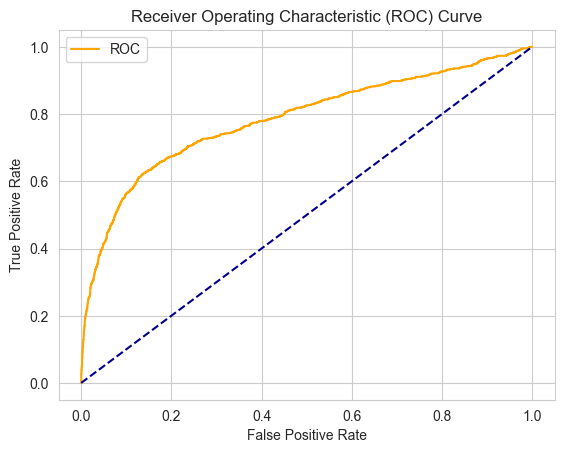

In [101]:
import matplotlib.pyplot as plt
plot_roc_curve(fpr, tpr)

#### Accuracy of Logistic Regression: 90%

#### Model 2 (Support Vector Machines)

In [102]:
# Define X
X=bank_data.drop(labels=['y', 'duration'], axis=1)
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [103]:
# Define y
y=bank_data.y
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41176, dtype: int32

In [104]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier().fit(X, y)
clf.score(X, y)

0.9079803769185933

In [105]:
# Create training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=3)

In [106]:
# Balance the data
# Install imblearn package - pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [107]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [108]:
from collections import Counter
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 36537, 1: 4639})
SMOTE Classes Counter({0: 27399, 1: 27399})


In [109]:
# Support Vector Classifier Model
from sklearn.svm import SVC

# Base model with default parameters
svclassifier = SVC()
svclassifier.fit(X_smote, y_smote)

SVC()

In [110]:
# Predict output for X_test
y_hat=svclassifier.predict(X_test)

In [111]:
# Evaluating the model created
from sklearn.metrics import accuracy_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.7151738877015738

In [112]:
# Classification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives
# are used to predict the metrics of a classification report
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      9138
           1       0.24      0.69      0.35      1156

    accuracy                           0.72     10294
   macro avg       0.59      0.71      0.59     10294
weighted avg       0.87      0.72      0.77     10294



In [113]:
cm1=pd.crosstab(y_test,y_hat)
cm1

col_0,0,1
y,,
0,6559,2579
1,353,803


In [114]:
# F1 score considers both Precision and Recall for evaluating a model
f1=f1_score(y_test,y_hat)
f1

0.3539003966505069

In [115]:
# Check cross validation score
# STD < 0.05 is good
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,X,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.00900901 0.26859046 0.51464714]
Cross validation Score: 0.26408220040313984
Std : 0.20645051453487095


#### Accuracy of SVM: 70%

#### Model 3 (Random Forest)

In [116]:
# Define X
X=bank_data.drop(labels=['y', 'duration'], axis=1)
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [117]:
# Define y
y=bank_data.y
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41176, dtype: int32

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [119]:
# Testing
y_predict=rf_clf.predict(X_test)

In [120]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9138
           1       0.55      0.29      0.38      1156

    accuracy                           0.89     10294
   macro avg       0.73      0.63      0.66     10294
weighted avg       0.87      0.89      0.88     10294



#### Accuracy of Random Forest: 90%

#### Model 4 (KNeighborsClassifier)

In [121]:
# Define X
X=bank_data.drop(labels=['y', 'duration'], axis=1)
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [122]:
# Define y
y=bank_data.y
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41176, dtype: int32

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [124]:
# Scale the data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [125]:
# Split the training and testing data
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=42)

In [126]:
# Taking optimal k to determine how many nearest neighbors to create.
error_rate = [] # Create a list to store the error values for each k

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

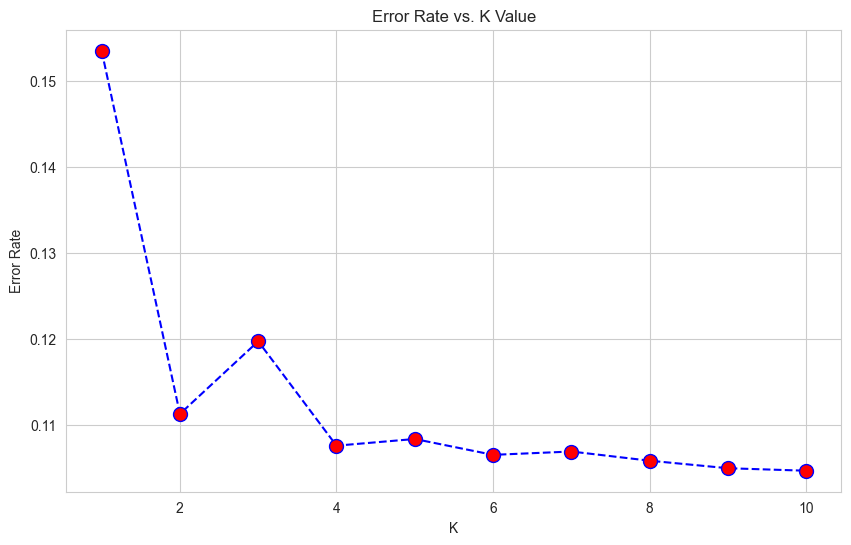

In [127]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### As the number of K increases, the error reduces.

In [128]:
# Fit the data into KNN model
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [129]:
# Predict
y_pred = knn.predict(X_test)

In [130]:
# Check Accuracy Score
print("The k-NN accuracy score is : ", accuracy_score(y_test,y_pred))

The k-NN accuracy score is :  0.8935302117738488


In [131]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9094
           1       0.62      0.22      0.32      1200

    accuracy                           0.89     10294
   macro avg       0.76      0.60      0.63     10294
weighted avg       0.87      0.89      0.87     10294



#### Accuracy of KNN: 89%

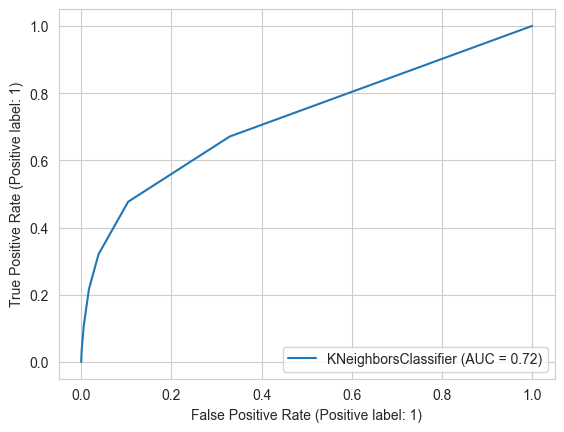

In [132]:
# Use sklearn to plot ROC curves
from sklearn.metrics import plot_roc_curve
plot_roc_curve(knn, X_test, y_test, name = 'KNeighborsClassifier')

### Model 5 (XGBClassifier)

In [133]:
# Define X
X=bank_data.drop(labels=['y', 'duration'], axis=1)
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [134]:
# Define y
y=bank_data.y
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41176, dtype: int32

In [135]:
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=45)
# fit model no training data

model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of XGBClassifier is : %.2f%%" % (accuracy * 100.0))

Accuracy of XGBClassifier is : 89.97%


In [136]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.022917397153469965

In [137]:
y_pred=rf_clf.predict(X_test)
f_Score=f1_score(y_test,y_pred)
f_Score

0.85941893158388

In [138]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      9159
           1       0.92      0.81      0.86      1135

    accuracy                           0.97     10294
   macro avg       0.95      0.90      0.92     10294
weighted avg       0.97      0.97      0.97     10294



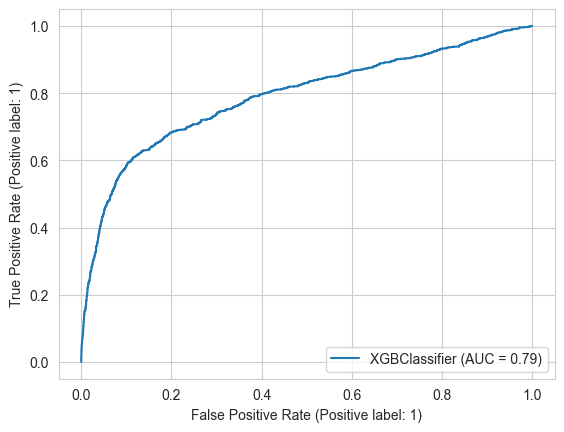

In [139]:
# Use sklearn to plot ROC curves
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test, y_test, name = 'XGBClassifier')

### Other Ways to Improve Classification Performance:

Hyperparameter Tuning. This will affect model's parameters during training phase. So it is very essential to set the right hyperparameters. It is completely trial and error which can give you best accuracy by few percentage points.

Treating Outliers as we do not have any missing values. Outliers can be bias on the accuracy of the model. Very important treatment.

### Tuning the Model

In [141]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [142]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [143]:
from sklearn.model_selection import RandomizedSearchCV
rf_Model = RandomForestClassifier(random_state=40)
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [144]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=40),
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [145]:
rf_RandomGrid.best_params_

{'n_estimators': 48,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': True}

In [147]:
print (f'Train Accuracy: {rf_RandomGrid.score(X_train,y_train):.3f}')
print (f'Test Accuracy: {rf_RandomGrid.score(X_test,y_test):.3f}')

Train Accuracy: 0.900
Test Accuracy: 0.900


As we can see our accuracy is quite good and we are getting good trade-off between testing and training accuracies.

### Final Observations

1. The main objective of this project  is to test the accuracy of models and develop a new model to predict the success of bank telemarketing.

2. From the above model implementation, we can see that all models performed well except for SVM.

**Challenges**

As a result, no general agreement can be reached regarding the features that are most important to the effectiveness of bank telemarketing prediction across all the techniques used.

**Additional Observation(s)**

Additionally, customers with administrative positions make up the majority of those who have subscribed to the term deposit, with technicians making up the second-largest group.

A large number of our former clients have applied for a house loan, while very few have done so for a personal loan. The preferred method of contacting clients appears to be via cell phones and most clients were contacted in the month of May.
